In [1]:
import sys
sys.path.append("..")
sys.path.append("../data")
sys.path.append("../src")
sys.path.append("../data/embeddings")
sys.path.append("../data/sets_palabras")
import tests

import json
import gensim
import re
import regex as re
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim import matutils
import random
import sklearn
from sklearn.svm import LinearSVC, SVC
import numpy as np 
from numpy import dot
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

import math
from itertools import combinations, filterfalse
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

### Contenidos:
* [Gender Association Tests](#1)
* [Gender Component Test](#2)
* [Grammatical Gender Classification Test](#4)

### Load embeddings

In [2]:
# Biased
biased_model = KeyedVectors.load('../data/embeddings/keyedvectors/model_esp.kv', mmap='r')

In [3]:
# Debiased with INLP
inlp_debiased_model = KeyedVectors.load('../data/embeddings/keyedvectors/inlp_debiased_model_esp.kv', mmap='r')

In [4]:
# Debiased with INLP-ES
inlpES_debiased_model = KeyedVectors.load('../data/embeddings/keyedvectors/inlpES_debiased_model_esp.kv', mmap='r')

In [5]:
# Debiased with INLP-ES V2
inlpES_debiased_model_V2 = KeyedVectors.load('../data/embeddings/keyedvectors/inlpES_debiased_model_esp_V2.kv', mmap='r')

In [6]:
# Debiased with INLP-ES V3
inlpES_debiased_model_V3 = KeyedVectors.load('../data/embeddings/keyedvectors/inlpES_debiased_model_esp_V3.kv', mmap='r')

In [7]:
inlpES_debiased_model_1000 = KeyedVectors.load('../data/embeddings/keyedvectors/inlpES_debiased_model_1000.kv', mmap='r')

In [12]:
inlpES_debiased_model_V5 = KeyedVectors.load('../data/embeddings/keyedvectors/inlpES_debiased_model_esp_V5.kv', mmap='r')

In [14]:
inlpES_debiased_model_V5_mod = KeyedVectors.load('../data/embeddings/keyedvectors/inlpES_debiased_model_esp_V5_mod.kv', mmap='r')

In [4]:
inlpES_debiased_model_V6 = KeyedVectors.load('../data/embeddings/keyedvectors/inlpES_debiased_model_esp_V6.kv', mmap='r')

In [4]:
inlpES_debiased_model_V7 = KeyedVectors.load('../data/embeddings/keyedvectors/inlpES_debiased_model_esp_V7.kv', mmap='r')

### Load gender directions

Gender direction PCA

In [20]:
ES_gender_direction_PCA = np.loadtxt("gender_direction_PCA")

Grammatical gender direction

In [13]:
grammatical_gender_direction = np.loadtxt("ES_grammar_gender_direction_LDA_3000")

In [14]:
grammatical_gender_direction_V2 = np.loadtxt("ES_grammar_gender_direction_LDA_3000_V2")

In [4]:
grammatical_gender_direction_V3 = np.loadtxt("grammatical_gender_direction_V3")

In [4]:
ES_grammatical_gender_direction_LDA_1000 = np.loadtxt("ES_grammatical_gender_direction_LDA_1000")

In [5]:
grammatical_gender_direction_V5 = np.loadtxt("grammatical_gender_direction_V5")

In [9]:
grammatical_gender_direction_V6 = np.loadtxt("grammatical_gender_direction_V6") # con plurales

Semantic gender direction

In [17]:
ES_semantic_gender_direction = np.loadtxt("semantic_gender_direction")

In [17]:
ES_semantic_gender_direction_V2 = np.loadtxt("semantic_gender_direction_V2")

In [41]:
semantic_gender_direction_V3 = np.loadtxt("semantic_gender_direction_V3")

In [21]:
ES_semantic_gender_direction_1000 = np.loadtxt("ES_semantic_gender_direction_1000")

In [25]:
semantic_gender_direction_V5 = np.loadtxt("semantic_gender_direction_V5")

In [13]:
semantic_gender_direction_V6 = np.loadtxt("semantic_gender_direction_V6")

### Plot professions on the semantic gender direction <a class="anchor" id="2"></a>

In [6]:
import tests

with open('../data/sets_palabras/ES/ES_professions.json', "r", encoding='utf-8') as f:
    professions = json.load(f)

print(professions[:5])
print(len(professions))

professions_con_flexion_genero = []

for profession in professions :
    if profession[0] != profession[1] :
        professions_con_flexion_genero.append(profession)

print(professions_con_flexion_genero[:5])
print(len(professions_con_flexion_genero))

profession_pairs = []

for profession in professions_con_flexion_genero:
    pair = []
    pair.append(profession[0])
    pair.append(profession[1])
    profession_pairs.append(pair)

print(profession_pairs[:5])
print(len(profession_pairs))

[['abadesa', 'abad', 'abades', 'abadesas'], ['abaleadora', 'abaleador', 'abaleadores', 'abaleadoras'], ['abaniquera', 'abaniquero', 'abaniqueros', 'abaniqueras'], ['abarquera', 'abarquero', 'abarqueros', 'abarqueras'], ['abastecedora', 'abastecedor', 'abastecedores', 'abastecedoras']]
1376
[['abadesa', 'abad', 'abades', 'abadesas'], ['abaleadora', 'abaleador', 'abaleadores', 'abaleadoras'], ['abaniquera', 'abaniquero', 'abaniqueros', 'abaniqueras'], ['abarquera', 'abarquero', 'abarqueros', 'abarqueras'], ['abastecedora', 'abastecedor', 'abastecedores', 'abastecedoras']]
1038
[['abadesa', 'abad'], ['abaleadora', 'abaleador'], ['abaniquera', 'abaniquero'], ['abarquera', 'abarquero'], ['abastecedora', 'abastecedor']]
1038


In [12]:
tests.Gender_Component_Test(profession_pairs, biased_model, ES_semantic_gender_direction_1000)

-0.2394342291028875

In [13]:
tests.Gender_Component_Test(profession_pairs, inlp_debiased_model, ES_gender_direction_PCA)

-0.0039414838568805535

In [14]:
tests.Gender_Component_Test(profession_pairs, inlpES_debiased_model_1000, ES_semantic_gender_direction_1000)

-0.0019590170224018056

In [22]:
tests.Gender_Component_Test_pval(profession_pairs, biased_model, ES_semantic_gender_direction_1000)

Gender Component Test Score: -0.2394342291028875


INFO:root:  Iteration 100. Iteration Score: -0.1499856786488693. Mean p-value: 0.0
INFO:root:  Iteration 200. Iteration Score: -0.07247521961776199. Mean p-value: 0.0
INFO:root:  Iteration 300. Iteration Score: -0.17326951935570678. Mean p-value: 0.0
INFO:root:  Iteration 400. Iteration Score: -0.12608256401237766. Mean p-value: 0.0
INFO:root:  Iteration 500. Iteration Score: -0.03855938986940462. Mean p-value: 0.0
INFO:root:  Iteration 600. Iteration Score: -0.08487303575088452. Mean p-value: 0.0
INFO:root:  Iteration 700. Iteration Score: -0.03221978571372642. Mean p-value: 0.0
INFO:root:  Iteration 800. Iteration Score: -0.0671663683200973. Mean p-value: 0.0
INFO:root:  Iteration 900. Iteration Score: -0.06984046412132469. Mean p-value: 0.0
INFO:root:  Iteration 1000. Iteration Score: -0.030568852914918305. Mean p-value: 0.0


0.0

In [23]:
tests.Gender_Component_Test_pval(profession_pairs, inlp_debiased_model, ES_gender_direction_PCA)

Gender Component Test Score: -0.0039414838568805535


INFO:root:  Iteration 100. Iteration Score: -0.004304890484011326. Mean p-value: 0.09
INFO:root:  Iteration 200. Iteration Score: -0.0005421322268588925. Mean p-value: 0.075
INFO:root:  Iteration 300. Iteration Score: -0.0024383036761416762. Mean p-value: 0.07
INFO:root:  Iteration 400. Iteration Score: -0.001990492961488227. Mean p-value: 0.0725
INFO:root:  Iteration 500. Iteration Score: -0.001653817925166568. Mean p-value: 0.068
INFO:root:  Iteration 600. Iteration Score: 0.00016971496551989755. Mean p-value: 0.06333333333333334
INFO:root:  Iteration 700. Iteration Score: -0.003132315188969283. Mean p-value: 0.06285714285714286
INFO:root:  Iteration 800. Iteration Score: -0.00147524897339756. Mean p-value: 0.06875
INFO:root:  Iteration 900. Iteration Score: -0.0009438439070142142. Mean p-value: 0.07222222222222222
INFO:root:  Iteration 1000. Iteration Score: -0.0017268383545555864. Mean p-value: 0.073


0.073

In [24]:
tests.Gender_Component_Test_pval(profession_pairs, inlpES_debiased_model_1000, ES_semantic_gender_direction_1000)

Gender Component Test Score: -0.0019590170224018056


INFO:root:  Iteration 100. Iteration Score: -0.0010935019708700443. Mean p-value: 0.23
INFO:root:  Iteration 200. Iteration Score: -0.0036936452500177016. Mean p-value: 0.215
INFO:root:  Iteration 300. Iteration Score: -0.0017441378084002827. Mean p-value: 0.21
INFO:root:  Iteration 400. Iteration Score: -0.0014005027693835817. Mean p-value: 0.2275
INFO:root:  Iteration 500. Iteration Score: -0.0010011311535134536. Mean p-value: 0.222
INFO:root:  Iteration 600. Iteration Score: -0.0007698203561348724. Mean p-value: 0.23
INFO:root:  Iteration 700. Iteration Score: -0.0012134690419984494. Mean p-value: 0.23285714285714285
INFO:root:  Iteration 800. Iteration Score: -0.0012205859273820084. Mean p-value: 0.235
INFO:root:  Iteration 900. Iteration Score: 0.0006629028224620402. Mean p-value: 0.24
INFO:root:  Iteration 1000. Iteration Score: -0.0026888179730866803. Mean p-value: 0.235


0.235

In [18]:
tests.Gender_Component_Test_pval(profession_pairs, inlpES_debiased_model, ES_semantic_gender_direction)

Gender Component Test Score: -0.0020325286531188134


INFO:root:  Iteration 100. Iteration Score: -0.002183084339116349. Mean p-value: 0.17
INFO:root:  Iteration 200. Iteration Score: -0.0009835471626334815. Mean p-value: 0.23
INFO:root:  Iteration 300. Iteration Score: -0.004802816744580626. Mean p-value: 0.24
INFO:root:  Iteration 400. Iteration Score: -0.0007165830906731812. Mean p-value: 0.2425
INFO:root:  Iteration 500. Iteration Score: -0.001497834519570473. Mean p-value: 0.248
INFO:root:  Iteration 600. Iteration Score: -0.0017686952343789818. Mean p-value: 0.26
INFO:root:  Iteration 700. Iteration Score: -0.0020336543592938197. Mean p-value: 0.25142857142857145
INFO:root:  Iteration 800. Iteration Score: -0.0006676985637444079. Mean p-value: 0.24625
INFO:root:  Iteration 900. Iteration Score: -0.00204236092315609. Mean p-value: 0.24888888888888888
INFO:root:  Iteration 1000. Iteration Score: -0.001374286569848573. Mean p-value: 0.246


0.246

In [18]:
tests.Gender_Component_Test_pval(profession_pairs, inlpES_debiased_model_V2, ES_semantic_gender_direction_V2)

Gender Component Test Score: -0.0013666824004122875


INFO:root:  Iteration 100. Iteration Score: -0.0014791187771565429. Mean p-value: 0.53
INFO:root:  Iteration 200. Iteration Score: -0.0009603910969949187. Mean p-value: 0.53
INFO:root:  Iteration 300. Iteration Score: -0.001310950817114857. Mean p-value: 0.5233333333333333
INFO:root:  Iteration 400. Iteration Score: -0.001552726832118638. Mean p-value: 0.5325
INFO:root:  Iteration 500. Iteration Score: 0.00012013788025866482. Mean p-value: 0.512
INFO:root:  Iteration 600. Iteration Score: -9.784838377012537e-05. Mean p-value: 0.52
INFO:root:  Iteration 700. Iteration Score: -0.001467472217391131. Mean p-value: 0.5242857142857142
INFO:root:  Iteration 800. Iteration Score: -0.000397286183107335. Mean p-value: 0.52
INFO:root:  Iteration 900. Iteration Score: -0.0011021956938790868. Mean p-value: 0.5166666666666667
INFO:root:  Iteration 1000. Iteration Score: -0.0008916194081374427. Mean p-value: 0.513


0.513

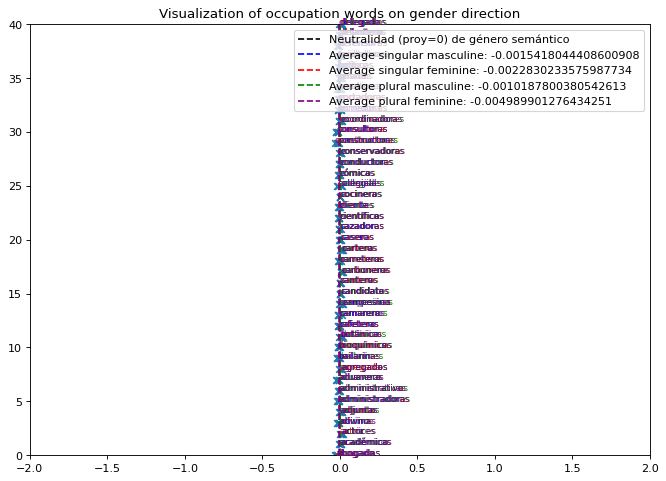

In [8]:
tests.plot_on_gender_direction(professions_con_flexion_genero, inlpES_debiased_model_1000, ES_semantic_gender_direction_1000)

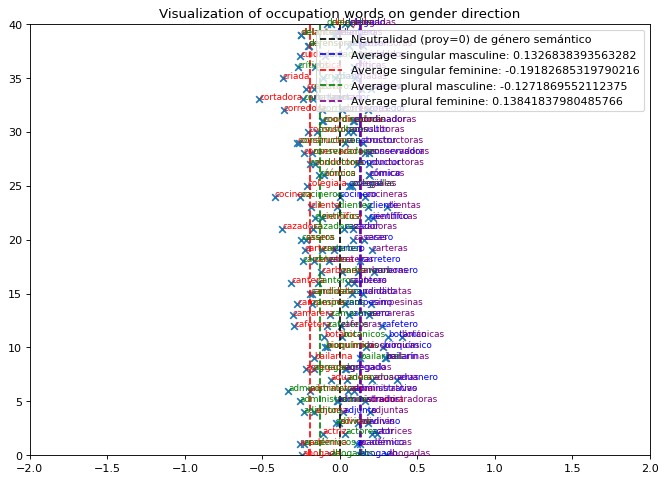

In [7]:
tests.plot_on_gender_direction(professions_con_flexion_genero, inlpES_debiased_model_V5_mod, grammatical_gender_direction_V5)

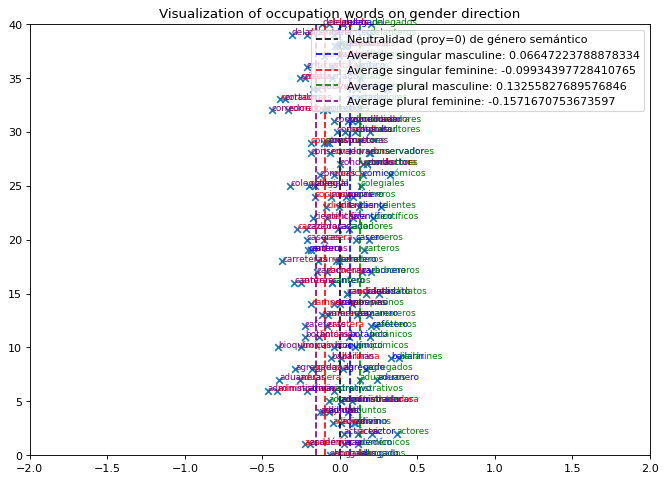

In [10]:
tests.plot_on_gender_direction(professions_con_flexion_genero, inlpES_debiased_model_V5_mod, grammatical_gender_direction_V6)

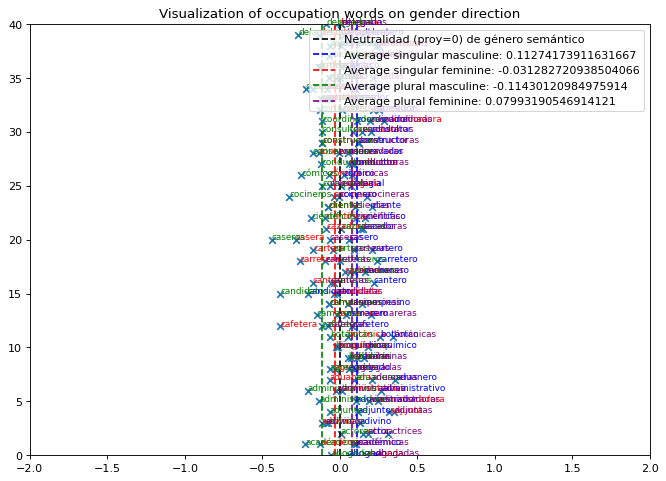

In [8]:
tests.plot_on_gender_direction(professions_con_flexion_genero, inlp_debiased_model, grammatical_gender_direction_V5)

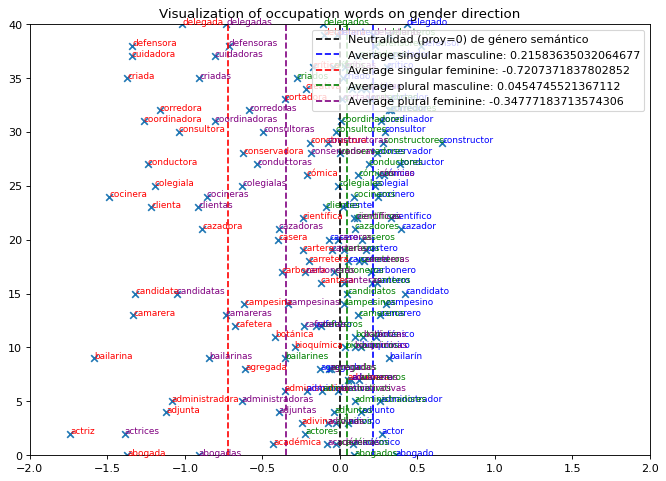

In [9]:
tests.plot_on_gender_direction(professions_con_flexion_genero, biased_model, semantic_gender_direction)

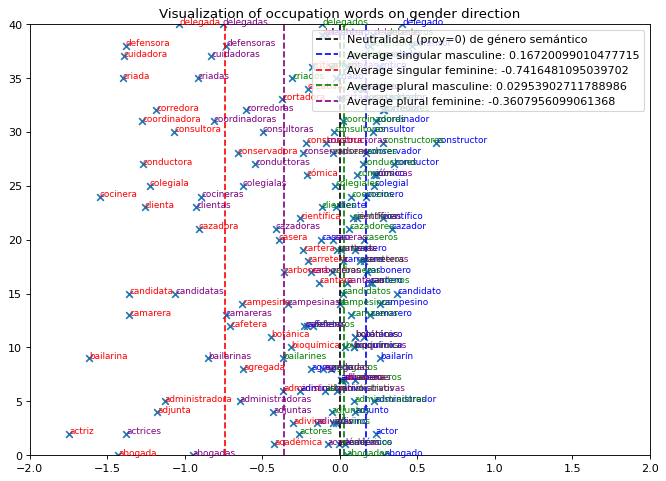

In [10]:
tests.plot_on_gender_direction(professions_con_flexion_genero, biased_model, semantic_gender_direction_V2)

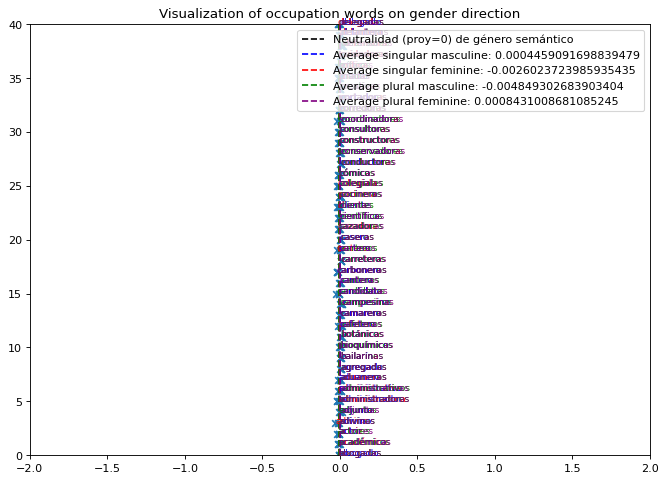

In [11]:
tests.plot_on_gender_direction(professions_con_flexion_genero, inlpES_debiased_model_V2, semantic_gender_direction_V2)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score

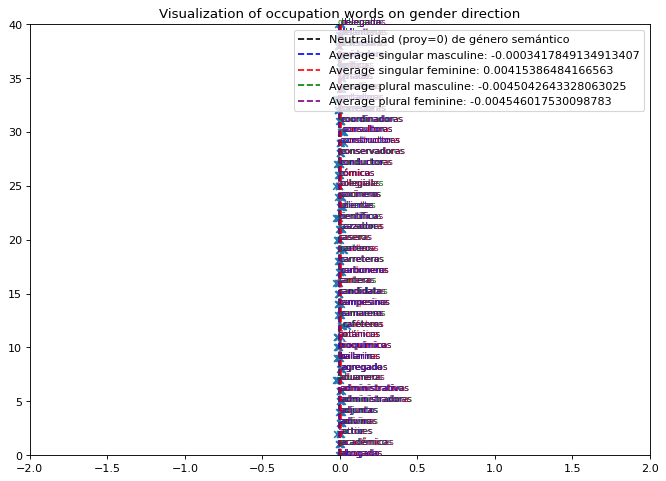

In [42]:
tests.plot_on_gender_direction(professions_con_flexion_genero, inlpES_debiased_model_V3, semantic_gender_direction_V3)

In [27]:
pairs = [
            ['mujer', 'hombre'], ['doctora', 'doctor'], ['bailarina', 'bailarín'], \
            ['cuchara','cuchillo'],['mesa','lápiz'],['mano','pie']
        ]

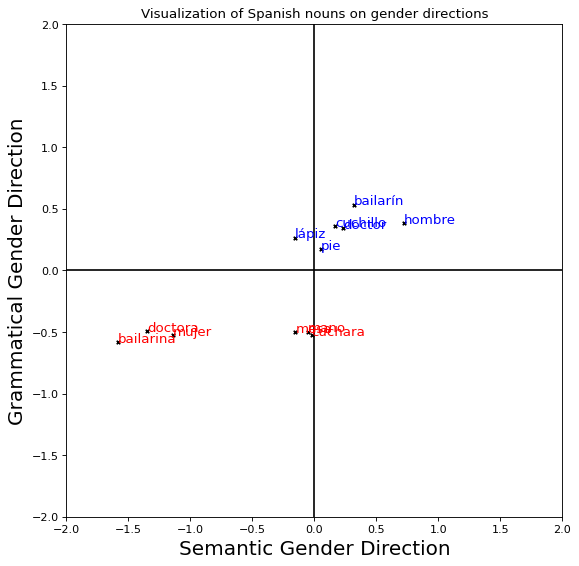

In [15]:
tests.plot_on_both_directions(pairs, biased_model, semantic_gender_direction, grammatical_gender_direction)

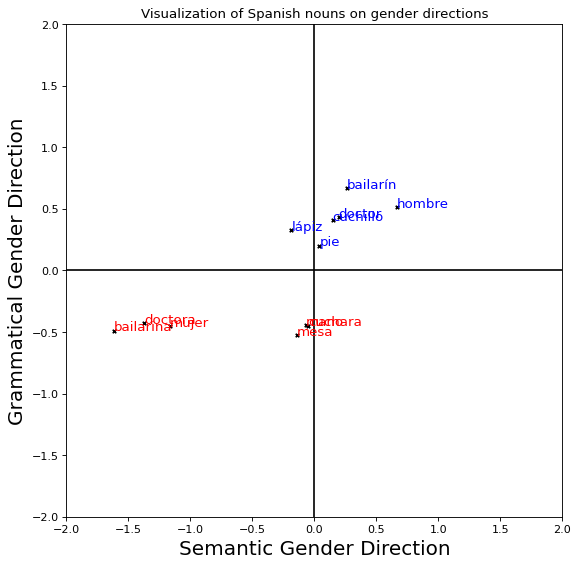

In [16]:
tests.plot_on_both_directions(pairs, biased_model, semantic_gender_direction_V2, grammatical_gender_direction_V2)

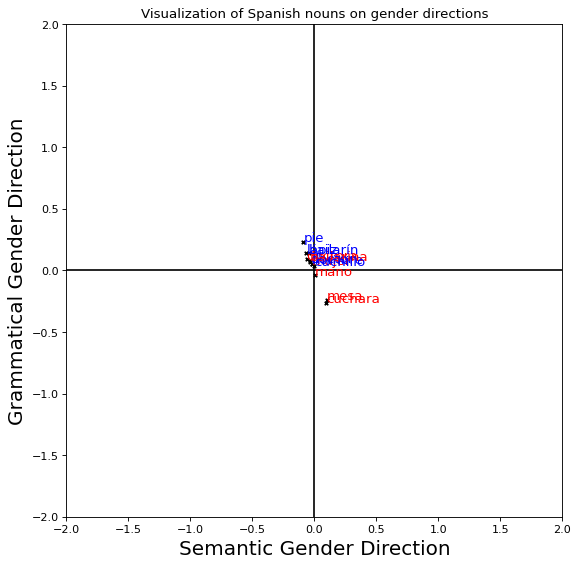

In [20]:
tests.plot_on_both_directions(pairs, inlp_debiased_model, semantic_gender_direction, grammatical_gender_direction)

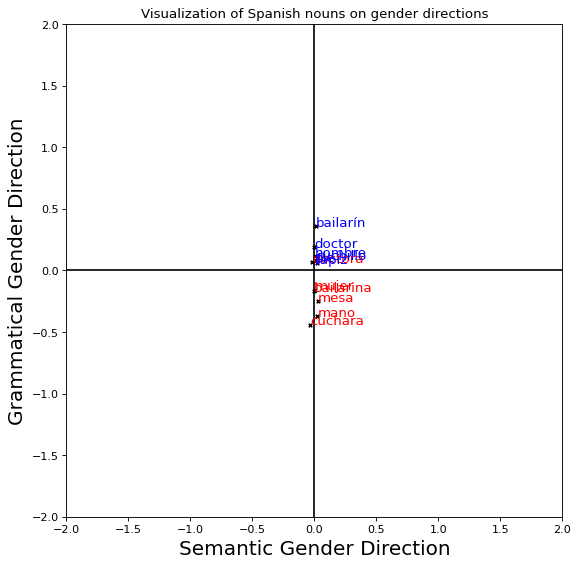

In [21]:
tests.plot_on_both_directions(pairs, inlpES_debiased_model, semantic_gender_direction, grammatical_gender_direction)

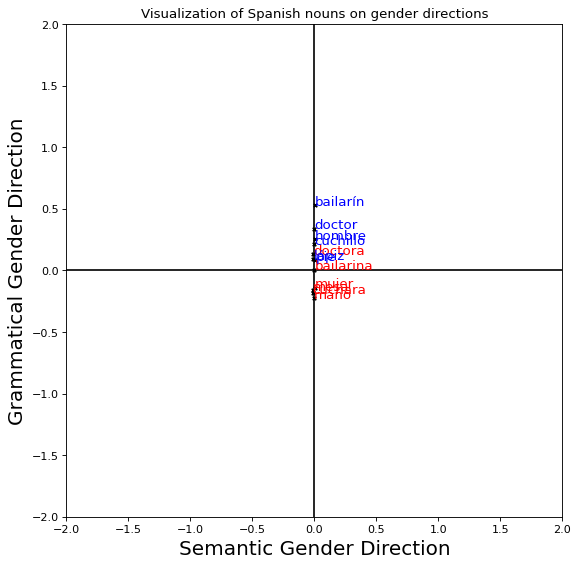

In [22]:
tests.plot_on_both_directions(pairs, inlpES_debiased_model_V2, semantic_gender_direction_V2, grammatical_gender_direction_V2)

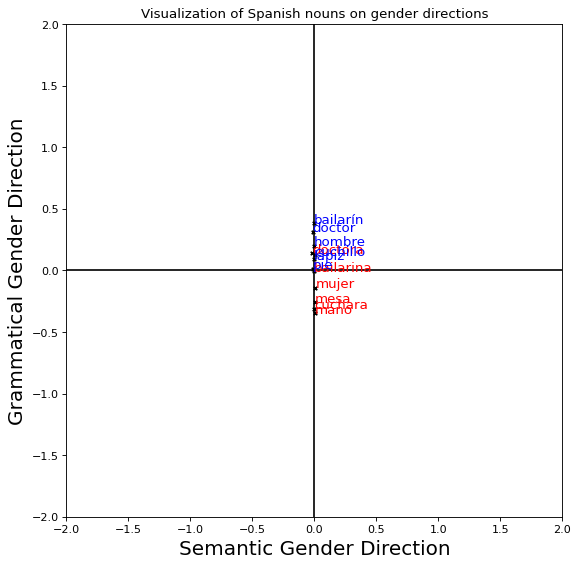

In [8]:
tests.plot_on_both_directions(pairs, inlpES_debiased_model_V3, semantic_gender_direction_V3, grammatical_gender_direction_V3)

In [ ]:
tests.plot_on_both_directions(pairs, inlpES_debiased_model_V5_mod, semantic_gender_direction_V5, grammatical_gender_direction_V5)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic

In [9]:
flatten_professions = []
for profession in professions_con_flexion_genero:
    flatten_professions += profession

print(flatten_professions[:10])
print(len(flatten_professions))

['abadesa', 'abad', 'abades', 'abadesas', 'abaleadora', 'abaleador', 'abaleadores', 'abaleadoras', 'abaniquera', 'abaniquero']
4152


10 most male biased projections: ['experto', 'constructor', 'explorador', 'fundador', 'boxeador', 'caudillo', 'boxeadores', 'carpintero', 'educador', 'filósofo'] 
10 most female biased projections: ['directora', 'escritora', 'actriz', 'bailarina', 'embajadora', 'bibliotecaria', 'criada', 'entrenadora', 'condesa', 'fundadora'] 


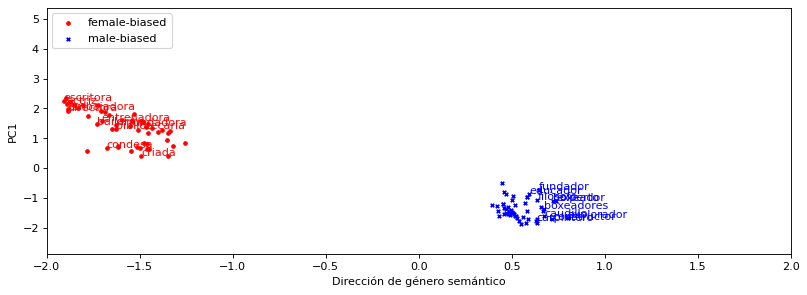

In [10]:
tests.plot_most_biased(flatten_professions, biased_model, semantic_gender_direction, size=2)

In [8]:
professions_plural_masculine = []
for profession in professions_con_flexion_genero:
    professions_plural_masculine.append(profession[2])

print(professions_plural_masculine[:10])
print(len(professions_plural_masculine))

['abades', 'abaleadores', 'abaniqueros', 'abarqueros', 'abastecedores', 'abejeros', 'abogados', 'abrevadores', 'abridores', 'abrillantadores']
962


10 most male biased projections: ['boxeadores', 'capitanes', 'exploradores', 'fontaneros', 'carpinteros', 'caudillos', 'diestros', 'dibujantes', 'coroneles', 'fundadores'] 
10 most female biased projections: ['cantantes', 'bailarines', 'criados', 'cancilleres', 'financieros', 'embajadores', 'actores', 'bibliotecarios', 'concejales', 'enfermeros'] 


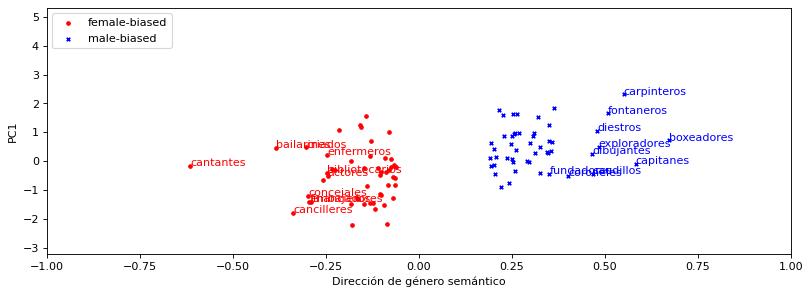

In [17]:
tests.plot_most_biased(professions_plural_masculine, biased_model, semantic_gender_direction, size=1)

10 most male biased projections: ['caseros', 'adaptadores', 'cocineros', 'boxeadores', 'cañeros', 'cofrades', 'diestros', 'dictadores', 'electromecánicos', 'acompañantes'] 
10 most female biased projections: ['correctores', 'comerciantes', 'balleneros', 'capataces', 'carboneros', 'exportadores', 'candeleros', 'diplomados', 'escribanos', 'alfareros'] 


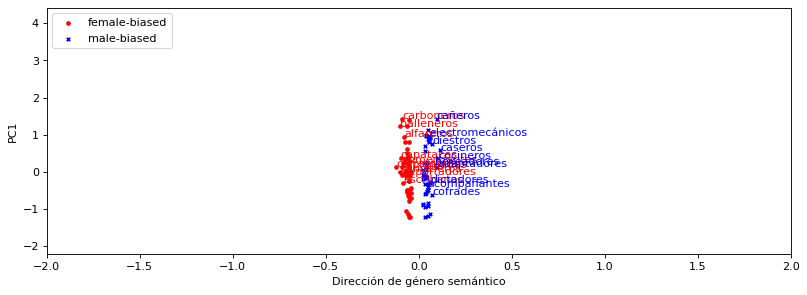

In [20]:
tests.plot_most_biased(professions_plural_masculine, inlp_debiased_model, semantic_gender_direction, size=2)

10 most male biased projections: ['formadores', 'empleadores', 'estadísticos', 'ermitaños', 'adjuntos', 'facultativos', 'actuarios', 'almorávides', 'adivinos', 'científicos'] 
10 most female biased projections: ['cobradores', 'cajeros', 'barones', 'clientes', 'emperadores', 'filibusteros', 'defensores', 'carniceros', 'canguros', 'dictadores'] 


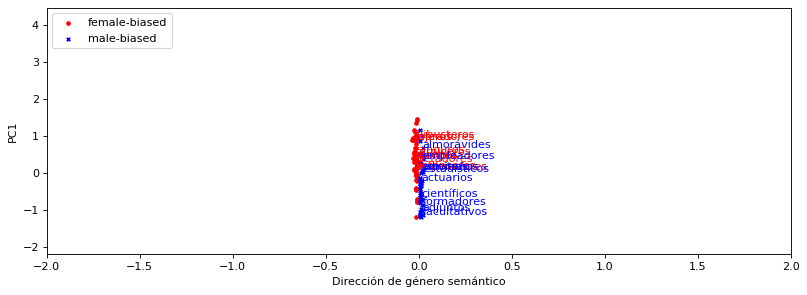

In [21]:
tests.plot_most_biased(professions_plural_masculine, inlpES_debiased_model, semantic_gender_direction, size=2)

10 most male biased projections: ['boticario', 'adivina', 'examinando', 'ensamblador', 'curador', 'formadores', 'empleadores', 'estadísticos', 'botánicas', 'empleador'] 
10 most female biased projections: ['cobradores', 'defensoras', 'corredoras', 'corredora', 'comisaria', 'aduanera', 'cobrador', 'cajeros', 'condesa', 'camarera'] 


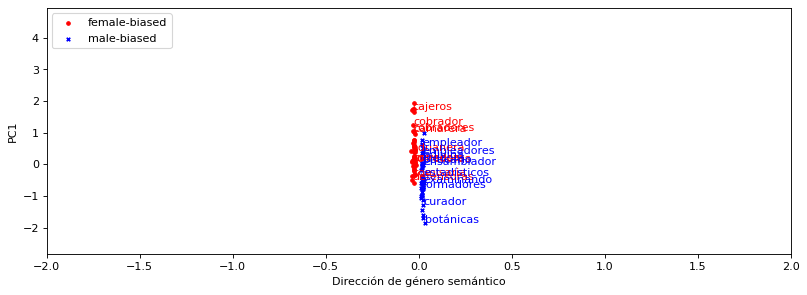

In [23]:
tests.plot_most_biased(flatten_professions, inlpES_debiased_model, semantic_gender_direction, size=2)

10 most male biased projections: ['adjunto', 'directora', 'consultor', 'despachador', 'funeraria', 'doctora', 'director', 'consultores', 'cerrajero', 'funerario'] 
10 most female biased projections: ['compositor', 'facultativo', 'cantautor', 'cuidadoras', 'empleador', 'facultativos', 'fiador', 'abridor', 'florero', 'cañeros'] 


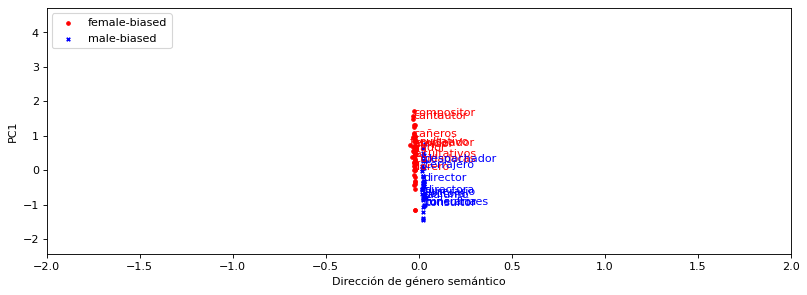

In [28]:
tests.plot_most_biased(flatten_professions, inlp_debiased_model, gender_direction_PCA, size=2)

10 most male biased projections: ['bailarines', 'creativo', 'coreógrafo', 'cinematográfico', 'bailarín', 'coproductor', 'codirector', 'evangelizador', 'escenógrafo', 'cuidador'] 
10 most female biased projections: ['criada', 'filósofa', 'cortadora', 'batidora', 'freidora', 'costurera', 'demoledora', 'cantinera', 'ferroviarios', 'directiva'] 


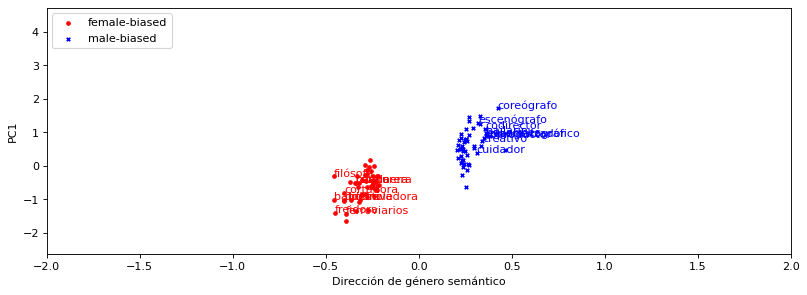

In [29]:
tests.plot_most_biased(flatten_professions, inlpES_debiased_model, grammatical_gender_direction, size=2)

10 most male biased projections: ['coordinadora', 'editora', 'directora', 'coautora', 'basurero', 'fundadora', 'financiero', 'correctoras', 'ballenero', 'codirector'] 
10 most female biased projections: ['físicas', 'camera', 'eléctricas', 'eléctrica', 'batidora', 'directiva', 'funeraria', 'cafetera', 'freidora', 'cochera'] 


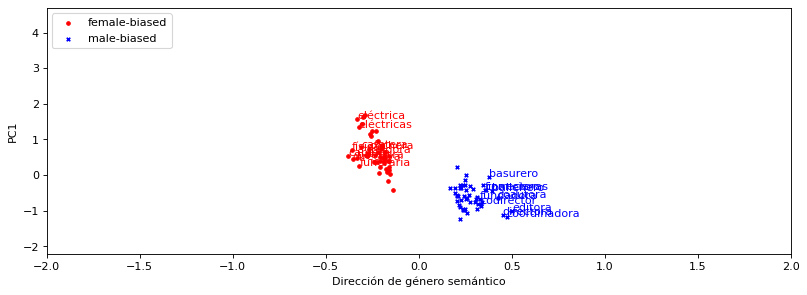

In [30]:
tests.plot_most_biased(flatten_professions, inlp_debiased_model, grammatical_gender_direction, size=2)

#### Este test también me sirve para evidenciar que hay género gramatical!!

10 most male biased projections: ['genético', 'cantores', 'conductor', 'copropietario', 'bailarín', 'buceador', 'capitán', 'camionero', 'empresario', 'cinematográfico'] 
_________
10 most female biased projections: ['freidora', 'batidora', 'conejera', 'demoledora', 'filósofa', 'grabadora', 'camera', 'gramáticas', 'gramática', 'fotocopiadora'] 


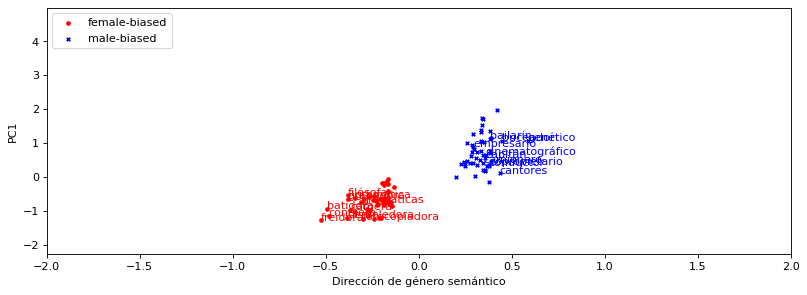

(['genético',
  'cantores',
  'conductor',
  'copropietario',
  'bailarín',
  'buceador',
  'capitán',
  'camionero',
  'empresario',
  'cinematográfico',
  'codirector',
  'cambiador',
  'dignatario',
  'cardiólogo',
  'ferroviario',
  'bailarines',
  'criador',
  'comprador',
  'escenógrafo',
  'exportador'],
 ['freidora',
  'batidora',
  'conejera',
  'demoledora',
  'filósofa',
  'grabadora',
  'camera',
  'gramáticas',
  'gramática',
  'fotocopiadora',
  'cafetera',
  'esbirros',
  'colegialas',
  'críticas',
  'estatuaria',
  'criada',
  'directivas',
  'cortadora',
  'bufa',
  'expendedora'])

In [10]:
tests.plot_most_biased(flatten_professions, inlpES_debiased_model_V3, grammatical_gender_direction_V3, size=2)

10 most male biased projections: ['basurero', 'financiero', 'directora', 'editora', 'granero', 'ejecutiva', 'exportador', 'coautora', 'escenógrafo', 'capataz'] 
_________
10 most female biased projections: ['gramáticas', 'físicas', 'grabadoras', 'grabadora', 'electrónicas', 'generales', 'camera', 'eléctrica', 'batidora', 'eléctricas'] 


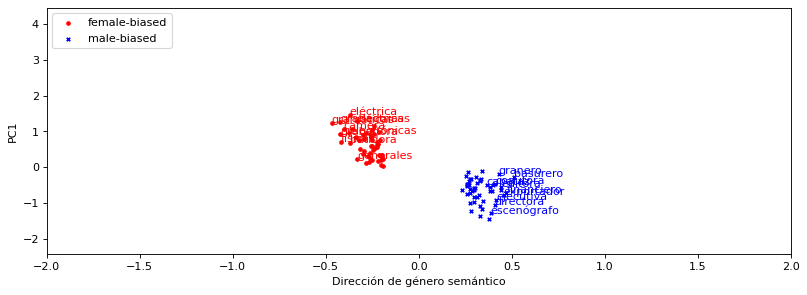

(['basurero',
  'financiero',
  'directora',
  'editora',
  'granero',
  'ejecutiva',
  'exportador',
  'coautora',
  'escenógrafo',
  'capataz',
  'cinematográfico',
  'cuidadora',
  'coordinadora',
  'fiscal',
  'diputada',
  'coreógrafo',
  'dramaturgo',
  'acomodador',
  'ballenero',
  'cuidador'],
 ['gramáticas',
  'físicas',
  'grabadoras',
  'grabadora',
  'electrónicas',
  'generales',
  'camera',
  'eléctrica',
  'batidora',
  'eléctricas',
  'gramática',
  'genéticas',
  'freidora',
  'gasolinera',
  'estatuaria',
  'grabadores',
  'electrónica',
  'conejera',
  'electromecánicos',
  'económicas'])

In [13]:
tests.plot_most_biased(flatten_professions, inlp_debiased_model, grammatical_gender_direction_V3, size=2)

In [14]:
masculine_words_V4 = []
feminine_words_V4 = []

with open("../data/sets_palabras/masculine_gram_gender_V4.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in masculine_words_V4:
            masculine_words_V4.append(word)

with open("../data/sets_palabras/feminine_gram_gender_V4.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in feminine_words_V4:
           feminine_words_V4.append(word)

grammar_pairs_V4 = []
for f,m in zip(feminine_words_V4, masculine_words_V4):
    pair = [f,m]
    grammar_pairs_V4.append(pair)

print(len(grammar_pairs_V4))

flatten_gram_words = []
for pair in grammar_pairs_V4:
    flatten_gram_words += pair

print(flatten_gram_words[:10])
print(len(flatten_gram_words))

268
['federación', 'período', 'continental', 'gran', 'explotación', 'viernes', 'judicial', 'primer', 'concatenación', 'tema']
536


10 most male biased projections: ['momento', 'día', 'perfecto', 'período', 'aumento', 'segundo', 'tiempo', 'diario', 'el', 'ininterrumpido'] 
_________
10 most female biased projections: ['insistencia', 'jerarquía', 'mirada', 'jugada', 'rapidez', 'tormenta', 'capa', 'escala', 'serie', 'reacción'] 


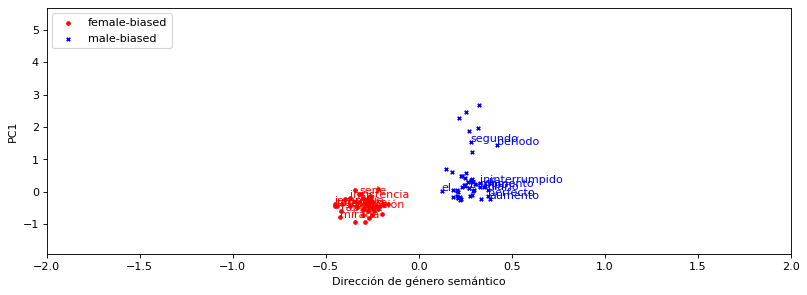

(['momento',
  'día',
  'perfecto',
  'período',
  'aumento',
  'segundo',
  'tiempo',
  'diario',
  'el',
  'ininterrumpido',
  'único',
  'tercer',
  'cuarto',
  'ferrocarril',
  'riesgo',
  'programa',
  'turismo',
  'inmenso',
  'séptimo',
  'número'],
 ['insistencia',
  'jerarquía',
  'mirada',
  'jugada',
  'rapidez',
  'tormenta',
  'capa',
  'escala',
  'serie',
  'reacción',
  'unidad',
  'monstruosa',
  'copia',
  'concatenación',
  'respuesta',
  'antigüedad',
  'imposición',
  'ofimática',
  'idas',
  'pretensión'])

In [15]:
tests.plot_most_biased(flatten_gram_words, inlpES_debiased_model_V3, grammatical_gender_direction_V3, size=2)

10 most male biased projections: ['abismo', 'diario', 'colectivo', 'inmenso', 'riesgo', 'espacio', 'tiempo', 'aumento', 'comité', 'mes'] 
_________
10 most female biased projections: ['conocidas', 'leídas', 'escritas', 'unas', 'serie', 'leída', 'estas', 'hipotética', 'estudiadas', 'esta'] 


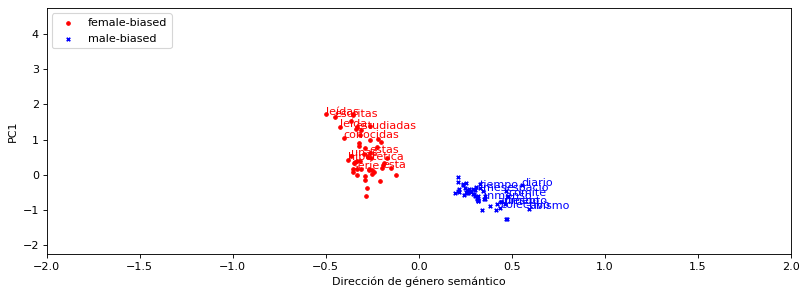

(['abismo',
  'diario',
  'colectivo',
  'inmenso',
  'riesgo',
  'espacio',
  'tiempo',
  'aumento',
  'comité',
  'mes',
  'incendio',
  'año',
  'excesivo',
  'período',
  'éxodo',
  'tercer',
  'creciente',
  'momento',
  'problema',
  'desarrollo'],
 ['conocidas',
  'leídas',
  'escritas',
  'unas',
  'serie',
  'leída',
  'estas',
  'hipotética',
  'estudiadas',
  'esta',
  'hechas',
  'estudiada',
  'reacción',
  'tecnología',
  'unidad',
  'corregidas',
  'las',
  'jugada',
  'costa',
  'impresas'])

In [16]:
tests.plot_most_biased(flatten_gram_words, inlp_debiased_model, grammatical_gender_direction_V3, size=2)

In [23]:
with open('../data/sets_palabras/gram_fem.json', "r", encoding='utf-8') as f:
    gram_fem = json.load(f)

with open('../data/sets_palabras/gram_masc.json', "r", encoding='utf-8') as f:
    gram_masc = json.load(f)
    
pairs_with_grammatical_gender = []
for i in range(50):
    par = []
    par.append(gram_fem[i])
    par.append(gram_masc[i])
    pairs_with_grammatical_gender.append(par)

print(pairs_with_grammatical_gender[:10])
print(len(pairs_with_grammatical_gender))

[['casa', 'árbol'], ['ventana', 'mapa'], ['mesa', 'papel'], ['silla', 'sol'], ['flor', 'lugar'], ['puerta', 'teclado'], ['pared', 'coche'], ['calle', 'teléfono'], ['ciudad', 'puente'], ['noche', 'reloj']]
50


In [25]:
feminine_gram_gender_V2 = []
masculine_gram_gender_V2 = []

with open('../data/sets_palabras/feminine_gram_gender_V2.txt', "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        feminine_gram_gender_V2.append(word)

with open('../data/sets_palabras/masculine_gram_gender_V2.txt', "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        masculine_gram_gender_V2.append(word)
    
pairs_with_grammatical_gender_V2 = []
for i in range(50):
    par = []
    par.append(feminine_gram_gender_V2[i])
    par.append(masculine_gram_gender_V2[i])
    pairs_with_grammatical_gender_V2.append(par)

print(pairs_with_grammatical_gender_V2[:10])
print(len(pairs_with_grammatical_gender_V2))

[['unión', 'período'], ['última', 'gran'], ['prensa', 'viernes'], ['inmensa', 'primer'], ['televisión', 'tema'], ['nueva', 'próximo'], ['asamblea', 'curso'], ['segunda', 'pasado'], ['inadmisibilidad', 'parlamento'], ['primera', 'máximo']]
50


### Classify grammatical gender <a class="anchor" id="3"></a>

### 1070 words

In [13]:
masculine_words_1000 = []
feminine_words_1000 = []

with open("../data/sets_palabras/ES/ES_gram_masc_1000.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in masculine_words_1000:
            masculine_words_1000.append(word)

with open("../data/sets_palabras/ES/ES_gram_fem_1000.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in feminine_words_1000:
           feminine_words_1000.append(word)

grammar_pairs_1000 = []
for f,m in zip(feminine_words_1000, masculine_words_1000):
    pair = [f,m]
    grammar_pairs_1000.append(pair)

print(len(grammar_pairs_1000))

1062


In [ ]:
tests.classify_grammatical_gender(grammar_pairs_1000, inlpES_debiased_model_1000)

K-NN
_________


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score

K-NN
_________


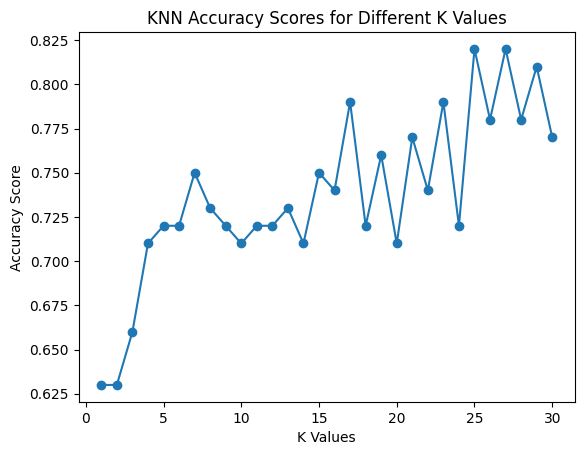

Best accuracy with cross-validation: 82.0%

Logistic Regression
_________
Confusion matrix: 
[[11  0]
 [ 0 14]]
Accuracy: 100.0%

Support Vector Machines
_________
Accuracy: 96.0%


In [9]:
tests.classify_grammatical_gender(pairs_with_grammatical_gender, biased_model)

K-NN
_________


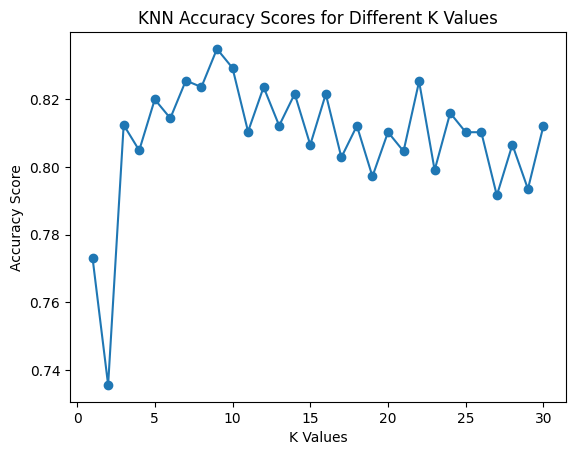

Best accuracy with cross-validation: 83.48792100158701%

Logistic Regression
_________
Confusion matrix: 
[[65  5]
 [ 0 64]]
Accuracy: 96.26865671641791%

Support Vector Machines
_________
Accuracy: 94.77611940298507%
_________
Average accuracy: 0.9151089904033%


In [18]:
tests.classify_grammatical_gender(grammar_pairs_V4, biased_model)

K-NN
_________


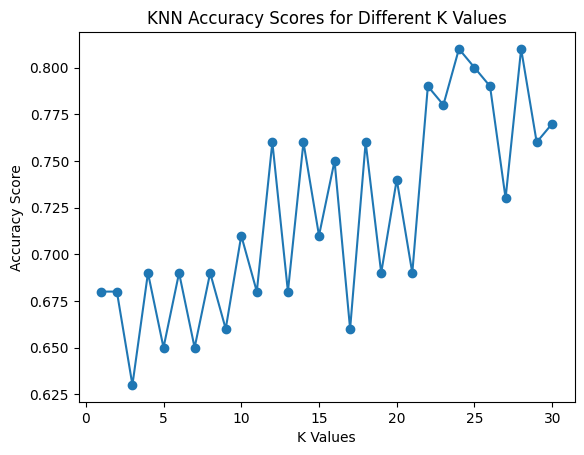

Best accuracy with cross-validation: 81.0%

Logistic Regression
_________
Confusion matrix: 
[[11  0]
 [ 5  9]]
Accuracy: 80.0%

Support Vector Machines
_________
Accuracy: 84.0%
_________
Average accuracy: 0.8166666666666668%


In [26]:
tests.classify_grammatical_gender(pairs_with_grammatical_gender_V2, biased_model)

K-NN
_________


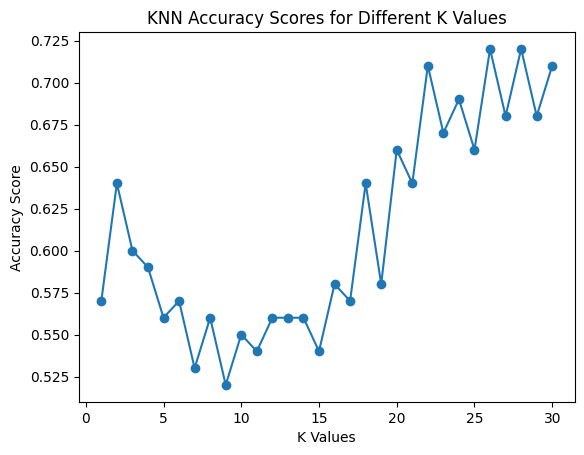

Best accuracy with cross-validation: 72.0%

Logistic Regression
_________
Confusion matrix: 
[[11  0]
 [ 4 10]]
Accuracy: 84.0%

Support Vector Machines
_________
Accuracy: 72.0%
_________
Average accuracy: 0.7600000000000001%


In [27]:
tests.classify_grammatical_gender(pairs_with_grammatical_gender_V2, inlpES_debiased_model_V2)

K-NN
_________


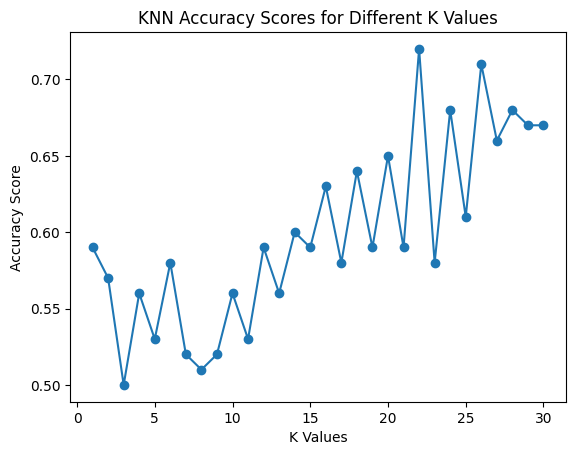

Best accuracy with cross-validation: 72.0%

Logistic Regression
_________
Confusion matrix: 
[[11  0]
 [ 6  8]]
Accuracy: 76.0%

Support Vector Machines
_________
Accuracy: 72.0%
_________
Average accuracy: 0.7333333333333334%


In [28]:
tests.classify_grammatical_gender(pairs_with_grammatical_gender_V2, inlp_debiased_model)

K-NN
_________


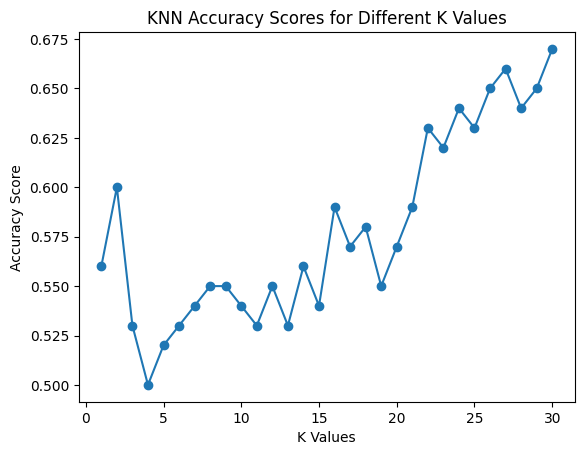

Best accuracy with cross-validation: 67.0%

Logistic Regression
_________
Confusion matrix: 
[[11  0]
 [ 6  8]]
Accuracy: 76.0%

Support Vector Machines
_________
Accuracy: 72.0%
_________
Average accuracy: 0.7166666666666667%


In [29]:
tests.classify_grammatical_gender(pairs_with_grammatical_gender_V2, inlpES_debiased_model)

K-NN
_________


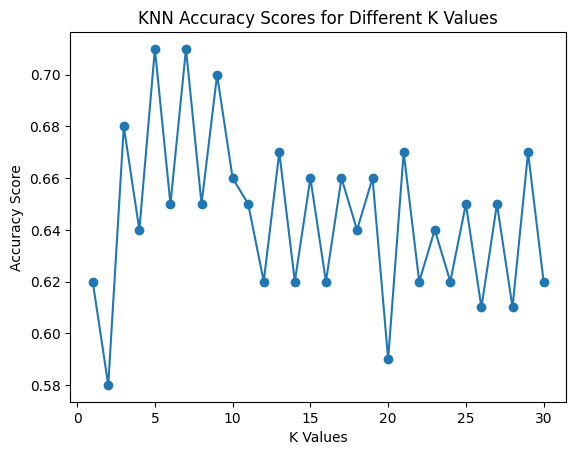

Best accuracy with cross-validation: 71.00000000000001%

Logistic Regression
_________
Confusion matrix: 
[[11  0]
 [ 1 13]]
Accuracy: 96.0%

Support Vector Machines
_________
Accuracy: 96.0%


In [10]:
tests.classify_grammatical_gender(pairs_with_grammatical_gender, inlp_debiased_model)

K-NN
_________


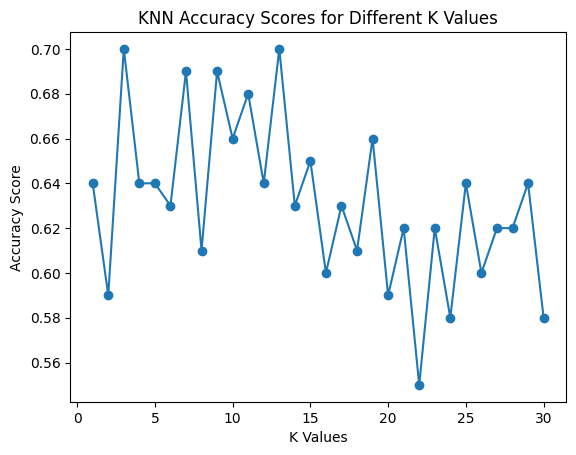

Best accuracy with cross-validation: 70.0%

Logistic Regression
_________
Confusion matrix: 
[[11  0]
 [ 2 12]]
Accuracy: 92.0%

Support Vector Machines
_________
Accuracy: 96.0%


In [11]:
tests.classify_grammatical_gender(pairs_with_grammatical_gender, inlpES_debiased_model)

K-NN
_________


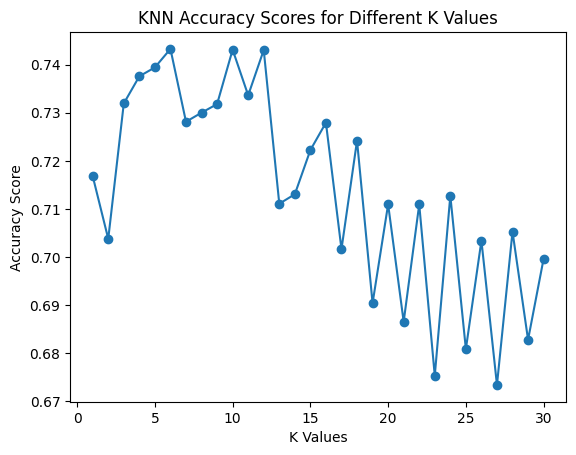

Best accuracy with cross-validation: 74.32727913948158%

Logistic Regression
_________
Confusion matrix: 
[[62  8]
 [10 54]]
Accuracy: 86.56716417910447%

Support Vector Machines
_________
Accuracy: 85.07462686567165%
_________
Average accuracy: 0.8198969006141922%


In [19]:
tests.classify_grammatical_gender(grammar_pairs_V4, inlpES_debiased_model_V3)

K-NN
_________


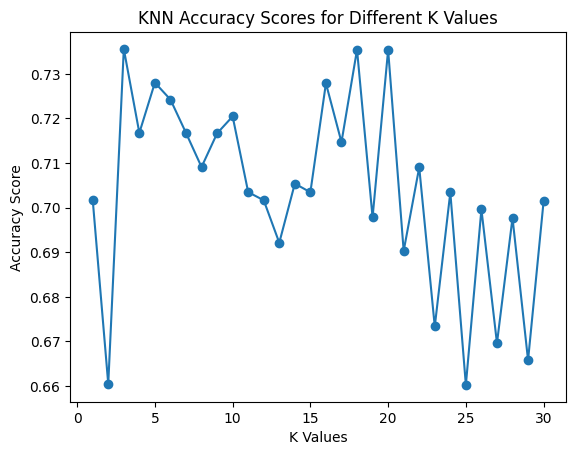

Best accuracy with cross-validation: 73.56021865632162%

Logistic Regression
_________
Confusion matrix: 
[[61  9]
 [ 8 56]]
Accuracy: 87.31343283582089%

Support Vector Machines
_________
Accuracy: 79.1044776119403%
_________
Average accuracy: 0.7999270970136093%


In [20]:
tests.classify_grammatical_gender(grammar_pairs_V4, inlp_debiased_model)

In [4]:
masculine_nouns = []
feminine_nouns = []

with open("../data/sets_palabras/masculine_nouns_es.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in masculine_nouns:
            masculine_nouns.append(word)

with open("../data/sets_palabras/feminine_nouns_es.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in feminine_nouns:
           feminine_nouns.append(word)

expanded_pairs_with_grammatical_gender = []
for f,m in zip(feminine_nouns, masculine_nouns):
    pair = [f,m]
    expanded_pairs_with_grammatical_gender.append(pair)

print(expanded_pairs_with_grammatical_gender[:10])
print(len(expanded_pairs_with_grammatical_gender))

[['espera', 'período'], ['unión', 'viernes'], ['prensa', 'gran'], ['televisión', 'tema'], ['asamblea', 'curso'], ['inadmisibilidad', 'parlamento'], ['ejecución', 'señor'], ['pena', 'artículo'], ['posición', 'jueves'], ['comunidad', 'apartado']]
4853


K-NN
_________


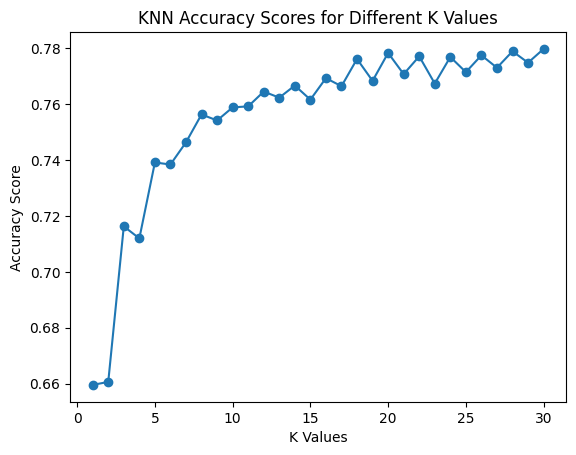

Best accuracy with cross-validation: 77.98328886727697%

Logistic Regression
_________
Confusion matrix: 
[[1000   76]
 [  96  906]]
Accuracy: 91.72281039461019%

Support Vector Machines
_________
Accuracy: 91.48219441770934%


In [12]:
tests.classify_grammatical_gender(expanded_pairs_with_grammatical_gender, biased_model)

K-NN
_________


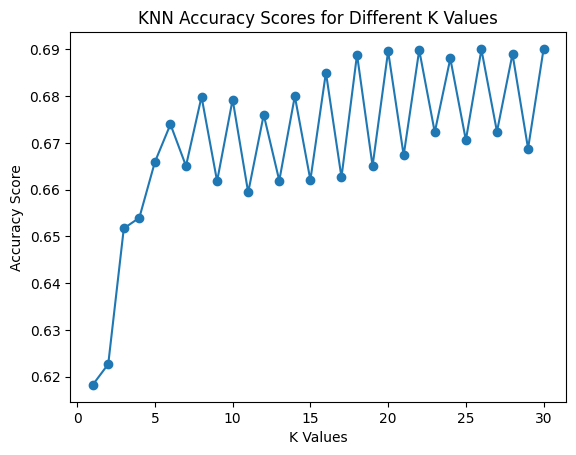

Best accuracy with cross-validation: 69.00768694738532%

Logistic Regression
_________
Confusion matrix: 
[[927 149]
 [164 838]]
Accuracy: 84.93743984600577%

Support Vector Machines
_________
Accuracy: 84.6968238691049%


In [13]:
tests.classify_grammatical_gender(expanded_pairs_with_grammatical_gender, inlp_debiased_model)

K-NN
_________


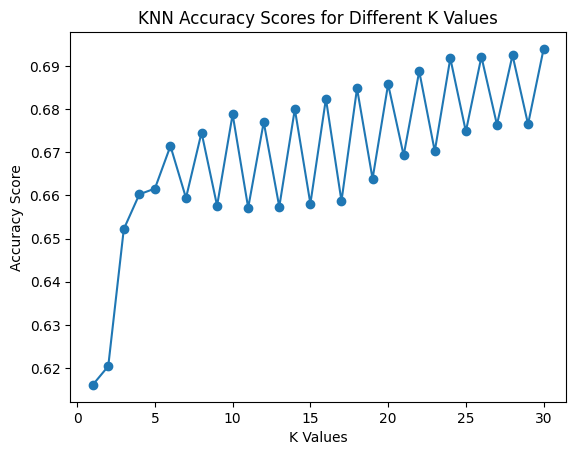

Best accuracy with cross-validation: 69.39276516639856%

Logistic Regression
_________
Confusion matrix: 
[[935 141]
 [153 849]]
Accuracy: 85.85178055822907%

Support Vector Machines
_________
Accuracy: 85.56304138594803%


In [14]:
tests.classify_grammatical_gender(expanded_pairs_with_grammatical_gender, inlpES_debiased_model)

10 most male biased projections: ['tiempo', 'método', 'modo', 'aparato', 'malhechor', 'experimento', 'periódico', 'surtido', 'sitio', 'jueguecito'] 
_________
10 most female biased projections: ['corriente', 'veronica', 'es', 'haya', 'dirección', 'cohorte', 'iban', 'segura', 'contiene', 'mañana'] 


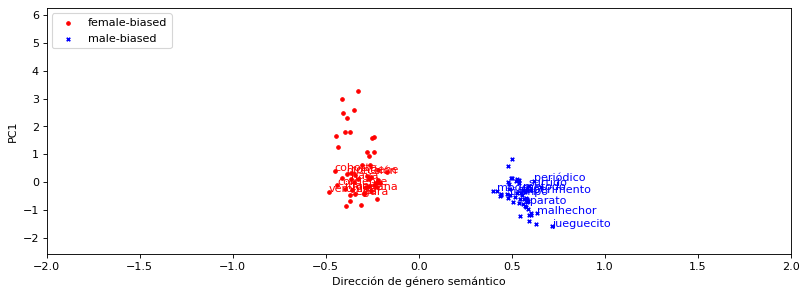

In [5]:
tests.plot_most_biased(masculine_nouns, biased_model, grammatical_gender_direction, size=2)

10 most male biased projections: ['comité', 'menos', 'precedente', 'traslado', 'elogio', 'tema', 'estado', 'pariente', 'líder', 'alcanzar'] 
_________
10 most female biased projections: ['cualidad', 'suya', 'tuya', 'cosa', 'ésta', 'versión', 'chica', 'gente', 'condición', 'estructura'] 


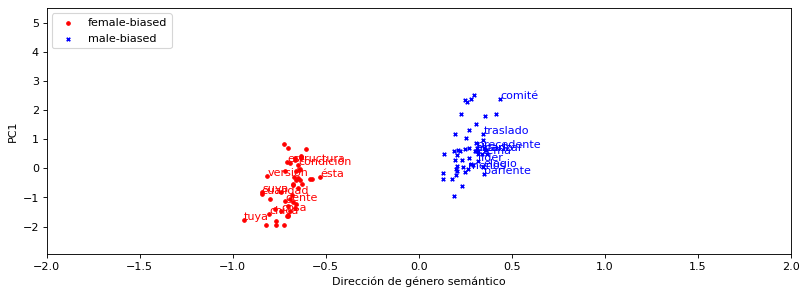

In [6]:
tests.plot_most_biased(feminine_nouns, biased_model, grammatical_gender_direction, size=2)

## Gender Association Tests <a class="anchor" id="1"></a>

In [9]:
weat_m = []
weat_f = []

with open("../data/sets_palabras/ES/ES_weat_m.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in weat_m:
            weat_m.append(word)

with open("../data/sets_palabras/ES/ES_weat_f.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in weat_f:
           weat_f.append(word)

print(weat_m)
print(weat_f)

['hombre', 'niño', 'padre', 'masculino', 'abuelo', 'esposo', 'hijo', 'tio']
['niña', 'femenina', 'tía', 'hija', 'esposa', 'mujer', 'madre', 'abuela']


In [10]:
with open('../data/sets_palabras/ES/ES_professions.json', "r", encoding='utf-8') as f:
    professions = json.load(f)

print(professions[:5])
print(len(professions))

professions_con_flexion_genero = []

for profession in professions :
    if profession[0] not in biased_model or profession[1] not in biased_model or profession[2] not in biased_model or profession[3] not in biased_model:
        continue
    if profession[0] != profession[1] :
        professions_con_flexion_genero.append(profession)

print(professions_con_flexion_genero[:5])
print(len(professions_con_flexion_genero))

# profession_pairs

profession_pairs = []

for profession in professions_con_flexion_genero:
    pair = []
    pair.append(profession[1])
    pair.append(profession[0])
    
    profession_pairs.append(pair)

print(profession_pairs[:10])
print(len(profession_pairs))

# professions_fem, professions_masc

professions_f = []
professions_m = []

for profession in professions_con_flexion_genero:
    professions_f.append(profession[0])
    professions_m.append(profession[1])


print(professions_f[:10])
print(professions_m[:10])

[['abadesa', 'abad', 'abades', 'abadesas'], ['abaleadora', 'abaleador', 'abaleadores', 'abaleadoras'], ['abaniquera', 'abaniquero', 'abaniqueros', 'abaniqueras'], ['abarquera', 'abarquero', 'abarqueros', 'abarqueras'], ['abastecedora', 'abastecedor', 'abastecedores', 'abastecedoras']]
1376
[['abogada', 'abogado', 'abogados', 'abogadas'], ['académica', 'académico', 'académicos', 'académicas'], ['actriz', 'actor', 'actores', 'actrices'], ['adivina', 'adivino', 'adivinos', 'adivinas'], ['adjunta', 'adjunto', 'adjuntos', 'adjuntas']]
79
[['abogado', 'abogada'], ['académico', 'académica'], ['actor', 'actriz'], ['adivino', 'adivina'], ['adjunto', 'adjunta'], ['administrador', 'administradora'], ['administrativo', 'administrativa'], ['aduanero', 'aduanera'], ['agregado', 'agregada'], ['bailarín', 'bailarina']]
79
['abogada', 'académica', 'actriz', 'adivina', 'adjunta', 'administradora', 'administrativa', 'aduanera', 'agregada', 'bailarina']
['abogado', 'académico', 'actor', 'adivino', 'adjunt

In [7]:
import tests

tests.WEAT_s(biased_model, "actriz", weat_m, weat_f)

0.17508507

In [8]:
tests.WEAT_s(inlp_debiased_model, "actriz", weat_m, weat_f)

0.011093132

In [9]:
tests.WEAT_s(inlpES_debiased_model_V6, "actriz", weat_m, weat_f)

0.048109442

In [5]:
tests.WEAT_s(inlpES_debiased_model_V7, "actriz", weat_m, weat_f)

0.05332738

In [9]:
import tests

tests.WEAT_effect_size(biased_model, professions_m, professions_f, weat_m, weat_f)

 Cohen's d: 0.9086555982915682, WEAT effect size: 0.8272773027420044


0.8272773

In [8]:
tests.WEAT_effect_size(inlp_debiased_model, professions_m, professions_f, weat_m, weat_f)

 Cohen's d: 0.09694116764361418, WEAT effect size: 0.09682748466730118


0.096827485

In [9]:
tests.WEAT_effect_size(inlpES_debiased_model_V6, professions_m, professions_f, weat_m, weat_f)

 Cohen's d: 0.43485936244745776, WEAT effect size: 0.4249309003353119


0.4249309

In [11]:
tests.WEAT_effect_size(inlpES_debiased_model_V7, professions_m, professions_f, weat_m, weat_f)

 Cohen's d: 2.8118584809410803, WEAT effect size: 1.6297858953475952


1.6297859

In [8]:
tests.WEAT_test_statistic(biased_model, professions_m, professions_f, weat_m, weat_f)

3.2348626255989075

In [7]:
import tests

tests.WEAT_p_value(biased_model, professions_m, professions_f, weat_m, weat_f)

INFO:root:  Iteration 0. Iteration Score: 2.1102005690336227. Mean p-value: 0.0


 WEAT Test statistic: 3.2348626255989075


INFO:root:  Iteration 100. Iteration Score: 1.0204332247376442. Mean p-value: 0.0
INFO:root:  Iteration 200. Iteration Score: 1.1421278193593025. Mean p-value: 0.0
INFO:root:  Iteration 300. Iteration Score: 0.5647445246577263. Mean p-value: 0.0
INFO:root:  Iteration 400. Iteration Score: 0.19071313738822937. Mean p-value: 0.0
INFO:root:  Iteration 500. Iteration Score: 0.16815513372421265. Mean p-value: 0.0
INFO:root:  Iteration 600. Iteration Score: 1.0331705585122108. Mean p-value: 0.0
INFO:root:  Iteration 700. Iteration Score: 0.5978155955672264. Mean p-value: 0.0
INFO:root:  Iteration 800. Iteration Score: 0.12502441555261612. Mean p-value: 0.0
INFO:root:  Iteration 900. Iteration Score: 0.2036765217781067. Mean p-value: 0.0


Test Statistic p-value: 0.0 (Significance threshold: 0.01)


0.0

In [8]:
tests.WEAT_p_value(inlp_debiased_model, professions_m, professions_f, weat_m, weat_f)

INFO:root:  Iteration 0. Iteration Score: 0.004149220883846283. Mean p-value: 0.0


 WEAT Test statistic: 0.07680555060505867


INFO:root:  Iteration 100. Iteration Score: 0.06468857824802399. Mean p-value: 0.48514851485148514
INFO:root:  Iteration 200. Iteration Score: 0.16126872971653938. Mean p-value: 0.48258706467661694
INFO:root:  Iteration 300. Iteration Score: 0.14755242317914963. Mean p-value: 0.4950166112956811
INFO:root:  Iteration 400. Iteration Score: 0.11660758033394814. Mean p-value: 0.5062344139650873
INFO:root:  Iteration 500. Iteration Score: 0.141773022711277. Mean p-value: 0.5169660678642715
INFO:root:  Iteration 600. Iteration Score: 0.2135086990892887. Mean p-value: 0.5274542429284526
INFO:root:  Iteration 700. Iteration Score: 0.0030460096895694733. Mean p-value: 0.5221112696148359
INFO:root:  Iteration 800. Iteration Score: 0.04739590734243393. Mean p-value: 0.5430711610486891
INFO:root:  Iteration 900. Iteration Score: 0.04554958641529083. Mean p-value: 0.5460599334073252


Test Statistic p-value: 0.546 (Significance threshold: 0.01)


0.546

In [10]:
tests.WEAT_p_value(inlpES_debiased_model_V6, professions_m, professions_f, weat_m, weat_f)

INFO:root:  Iteration 0. Iteration Score: 0.08351225592195988. Mean p-value: 0.0


 WEAT Test statistic: 0.5088969264179468


INFO:root:  Iteration 100. Iteration Score: 0.18595384620130062. Mean p-value: 0.009900990099009901
INFO:root:  Iteration 200. Iteration Score: 0.07695591636002064. Mean p-value: 0.009950248756218905
INFO:root:  Iteration 300. Iteration Score: 0.37823748029768467. Mean p-value: 0.009966777408637873
INFO:root:  Iteration 400. Iteration Score: 0.6471284199506044. Mean p-value: 0.014962593516209476
INFO:root:  Iteration 500. Iteration Score: 0.1815184075385332. Mean p-value: 0.011976047904191617
INFO:root:  Iteration 600. Iteration Score: 0.1006202194839716. Mean p-value: 0.009983361064891847
INFO:root:  Iteration 700. Iteration Score: 0.11872259341180325. Mean p-value: 0.008559201141226819
INFO:root:  Iteration 800. Iteration Score: 0.06547078303992748. Mean p-value: 0.008739076154806492
INFO:root:  Iteration 900. Iteration Score: 0.20318073220551014. Mean p-value: 0.008879023307436182


Test Statistic p-value: 0.009 (Significance threshold: 0.01)


0.009

In [12]:
tests.WEAT_p_value(inlpES_debiased_model_V7, professions_m, professions_f, weat_m, weat_f)

INFO:root:  Iteration 0. Iteration Score: 0.42826201766729355. Mean p-value: 0.0


 WEAT Test statistic: 2.5673321709036827


INFO:root:  Iteration 100. Iteration Score: 0.007660709321498871. Mean p-value: 0.0
INFO:root:  Iteration 200. Iteration Score: 0.15227500349283218. Mean p-value: 0.0
INFO:root:  Iteration 300. Iteration Score: 0.21948634833097458. Mean p-value: 0.0
INFO:root:  Iteration 400. Iteration Score: 0.19486425071954727. Mean p-value: 0.0
INFO:root:  Iteration 500. Iteration Score: 0.3665134832262993. Mean p-value: 0.0
INFO:root:  Iteration 600. Iteration Score: 0.036075837910175323. Mean p-value: 0.0
INFO:root:  Iteration 700. Iteration Score: 0.06186824291944504. Mean p-value: 0.0
INFO:root:  Iteration 800. Iteration Score: 0.11749505251646042. Mean p-value: 0.0
INFO:root:  Iteration 900. Iteration Score: 0.206717811524868. Mean p-value: 0.0


Test Statistic p-value: 0.0 (Significance threshold: 0.01)


0.0

In [14]:
from scipy import stats
import tests

s_f = [tests.gender_association_score(biased_model, w, weat_f) for w in professions_f]
s_m = [tests.gender_association_score(biased_model, w, weat_m) for w in professions_m]

print(mean(s_f))
print(mean(s_m))

stats.pearsonr(s_f, s_m)

0.04098511539697644
0.06488757579470088


PearsonRResult(statistic=0.5502887301591038, pvalue=3.2064304552574904e-83)

In [7]:
from statistics import mean, stdev
from math import sqrt

s_f = [tests.gender_association_score(biased_model, w, weat_f) for w in professions_f]
s_m = [tests.gender_association_score(biased_model, w, weat_f) for w in professions_m]

print(mean(s_f))
print(mean(s_m))

cohens_d = abs(mean(s_f) - mean(s_m)) / (sqrt((stdev(s_f) ** 2 + stdev(s_m) ** 2) / 2))

print(cohens_d)

0.23823752
0.15661624
0.9479216175507987


In [8]:
s_f = [tests.gender_association_score(inlp_debiased_model, w, weat_f) for w in professions_f]
s_m = [tests.gender_association_score(inlp_debiased_model, w, weat_m) for w in professions_m]

print(mean(s_f))
print(mean(s_m))

cohens_d = abs(mean(s_f) - mean(s_m)) / (sqrt((stdev(s_f) ** 2 + stdev(s_m) ** 2) / 2))

print(cohens_d)

0.05913251
0.06251537
0.16165902809513566


In [9]:
s_f = [tests.gender_association_score(inlpES_debiased_model_V6, w, weat_f) for w in professions_f]
s_m = [tests.gender_association_score(inlpES_debiased_model_V6, w, weat_m) for w in professions_m]

print(mean(s_f))
print(mean(s_m))

cohens_d = abs(mean(s_f) - mean(s_m)) / (sqrt((stdev(s_f) ** 2 + stdev(s_m) ** 2) / 2))

print(cohens_d)

0.08770295
0.091218166
0.08370675684886836


### MWEAT 

To quantify
 gender bias in English embeddings, Caliskan
 et al. (2017) propose Word Embedding Associa
tion Test (WEAT), which measures the association
 between two sets of target concepts and two sets
 of attributes. 

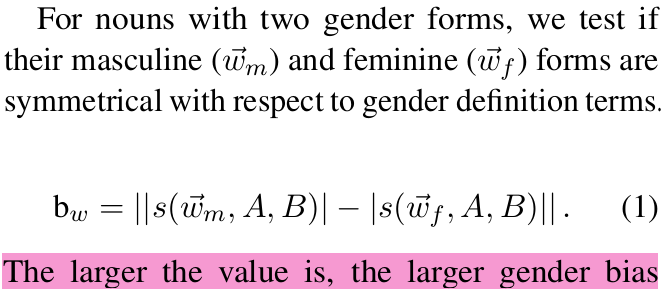

In [11]:
from IPython.display import Image
Image("img/mweat_formula.png")

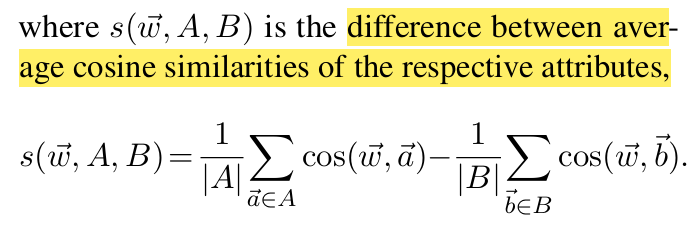

In [12]:
Image("img/mweat_formula2.png")

### Pruebas

In [ ]:
weat_m = ['tiempo', 'últimos', 'años', 'día', 'largo', 'lugar', 'juntos', 'minutos']
weat_f = ['tiempo', 'últimos', 'años', 'día', 'largo', 'lugar', 'juntos', 'minutos']

In [7]:
print(profession_pairs)

[['abogado', 'abogada'], ['académico', 'académica'], ['actor', 'actriz'], ['adivino', 'adivina'], ['adjunto', 'adjunta'], ['administrador', 'administradora'], ['administrativo', 'administrativa'], ['aduanero', 'aduanera'], ['agregado', 'agregada'], ['bailarín', 'bailarina'], ['bioquímico', 'bioquímica'], ['botánico', 'botánica'], ['cafetero', 'cafetera'], ['camarero', 'camarera'], ['campesino', 'campesina'], ['candidato', 'candidata'], ['cantero', 'cantera'], ['carbonero', 'carbonera'], ['carretero', 'carretera'], ['cartero', 'cartera'], ['casero', 'casera'], ['cazador', 'cazadora'], ['científico', 'científica'], ['cliente', 'clienta'], ['cocinero', 'cocinera'], ['colegial', 'colegiala'], ['cómico', 'cómica'], ['conductor', 'conductora'], ['conservador', 'conservadora'], ['constructor', 'constructora'], ['consultor', 'consultora'], ['coordinador', 'coordinadora'], ['corredor', 'corredora'], ['cortador', 'cortadora'], ['creativo', 'creativa'], ['criado', 'criada'], ['crítico', 'crítica'

In [7]:
import tests

tests.MWEAT(biased_model, profession_pairs, weat_m, weat_f)

3.2107038348913193

In [8]:
tests.MWEAT(inlp_debiased_model, profession_pairs, weat_m, weat_f)

0.11154168844223022

In [9]:
tests.MWEAT(inlpES_debiased_model_V6, profession_pairs, weat_m, weat_f)

0.6507885362952948

In [13]:
tests.MWEAT_pval(biased_model, profession_pairs, weat_m, weat_f, 1000)

MWEAT Diff: 3.2107038348913193


INFO:root:  Iteration 100. Iteration Score: 1.0391829311847687. Mean p-value: 0.0
INFO:root:  Iteration 200. Iteration Score: 0.645491473376751. Mean p-value: 0.0
INFO:root:  Iteration 300. Iteration Score: 0.015459209680557251. Mean p-value: 0.0
INFO:root:  Iteration 400. Iteration Score: 0.3998495638370514. Mean p-value: 0.0
INFO:root:  Iteration 500. Iteration Score: 2.3395237922668457. Mean p-value: 0.0
INFO:root:  Iteration 600. Iteration Score: 0.09301874786615372. Mean p-value: 0.0
INFO:root:  Iteration 700. Iteration Score: 0.8260663077235222. Mean p-value: 0.0
INFO:root:  Iteration 800. Iteration Score: 0.16040761023759842. Mean p-value: 0.0
INFO:root:  Iteration 900. Iteration Score: 1.3502540737390518. Mean p-value: 0.0
INFO:root:  Iteration 1000. Iteration Score: 1.9151823446154594. Mean p-value: 0.001


Test Statistic p-value: 0.001 (significance level: 0.05)


0.001

In [14]:
tests.MWEAT_pval(inlp_debiased_model, profession_pairs, weat_m, weat_f, 1000)

MWEAT Diff: 0.11154168844223022


INFO:root:  Iteration 100. Iteration Score: 0.2625633217394352. Mean p-value: 0.51
INFO:root:  Iteration 200. Iteration Score: 0.11144715175032616. Mean p-value: 0.54
INFO:root:  Iteration 300. Iteration Score: 0.05945752561092377. Mean p-value: 0.57
INFO:root:  Iteration 400. Iteration Score: 0.005017086863517761. Mean p-value: 0.5925
INFO:root:  Iteration 500. Iteration Score: 0.2625633217394352. Mean p-value: 0.582
INFO:root:  Iteration 600. Iteration Score: 0.061886124312877655. Mean p-value: 0.58
INFO:root:  Iteration 700. Iteration Score: 0.1389724425971508. Mean p-value: 0.5885714285714285
INFO:root:  Iteration 800. Iteration Score: 0.05293603986501694. Mean p-value: 0.58375
INFO:root:  Iteration 900. Iteration Score: 0.08539514616131783. Mean p-value: 0.6044444444444445
INFO:root:  Iteration 1000. Iteration Score: 0.2625633217394352. Mean p-value: 0.589


Test Statistic p-value: 0.589 (significance level: 0.05)


0.589

In [15]:
tests.MWEAT_pval(inlpES_debiased_model_V6, profession_pairs, weat_m, weat_f, 1000)

MWEAT Diff: 0.6507885362952948


INFO:root:  Iteration 100. Iteration Score: 0.19899466447532177. Mean p-value: 0.04
INFO:root:  Iteration 200. Iteration Score: 0.1839600931853056. Mean p-value: 0.035
INFO:root:  Iteration 300. Iteration Score: 0.19615515135228634. Mean p-value: 0.03333333333333333
INFO:root:  Iteration 400. Iteration Score: 0.3387598004192114. Mean p-value: 0.0425
INFO:root:  Iteration 500. Iteration Score: 0.2689828407019377. Mean p-value: 0.04
INFO:root:  Iteration 600. Iteration Score: 0.036712801083922386. Mean p-value: 0.03833333333333333
INFO:root:  Iteration 700. Iteration Score: 0.17219017632305622. Mean p-value: 0.045714285714285714
INFO:root:  Iteration 800. Iteration Score: 0.6507885362952948. Mean p-value: 0.04375
INFO:root:  Iteration 900. Iteration Score: 0.5991569552570581. Mean p-value: 0.042222222222222223
INFO:root:  Iteration 1000. Iteration Score: 0.6507885362952948. Mean p-value: 0.046


Test Statistic p-value: 0.046 (significance level: 0.05)


0.046

In [7]:
import tests

tests.MWEAT_pval(biased_model, profession_pairs, weat_m, weat_f, 1000)

MWEAT Diff: 0.062173602552964995


INFO:root:  Iteration 100. Iteration Score: 0.052496370834677904. Mean p-value: 0.01
INFO:root:  Iteration 200. Iteration Score: 0.05449879182111048. Mean p-value: 0.025
INFO:root:  Iteration 300. Iteration Score: 0.05052599547925638. Mean p-value: 0.02
INFO:root:  Iteration 400. Iteration Score: 0.045035231565446435. Mean p-value: 0.02
INFO:root:  Iteration 500. Iteration Score: 0.053391897758529566. Mean p-value: 0.02
INFO:root:  Iteration 600. Iteration Score: 0.043872686234200216. Mean p-value: 0.02
INFO:root:  Iteration 700. Iteration Score: 0.048275210960832. Mean p-value: 0.017142857142857144
INFO:root:  Iteration 800. Iteration Score: 0.05252363022527089. Mean p-value: 0.0175
INFO:root:  Iteration 900. Iteration Score: 0.04471527463331823. Mean p-value: 0.016666666666666666
INFO:root:  Iteration 1000. Iteration Score: 0.0571310126229946. Mean p-value: 0.015


Test Statistic p-value: 0.015 (significance level: 0.05)


0.015

In [8]:
tests.MWEAT_pval(inlp_debiased_model, profession_pairs, weat_m, weat_f, 1000)

MWEAT Diff: 0.00867119281343512


INFO:root:  Iteration 100. Iteration Score: 0.01198623607027772. Mean p-value: 0.99
INFO:root:  Iteration 200. Iteration Score: 0.00845657746671019. Mean p-value: 0.985
INFO:root:  Iteration 300. Iteration Score: 0.012619893080081965. Mean p-value: 0.99
INFO:root:  Iteration 400. Iteration Score: 0.010723285680232321. Mean p-value: 0.9925
INFO:root:  Iteration 500. Iteration Score: 0.011092203669509868. Mean p-value: 0.99
INFO:root:  Iteration 600. Iteration Score: 0.011978762601695237. Mean p-value: 0.9916666666666667
INFO:root:  Iteration 700. Iteration Score: 0.013024092053837517. Mean p-value: 0.9928571428571429
INFO:root:  Iteration 800. Iteration Score: 0.01262658017713665. Mean p-value: 0.99375
INFO:root:  Iteration 900. Iteration Score: 0.011015663246492908. Mean p-value: 0.9922222222222222
INFO:root:  Iteration 1000. Iteration Score: 0.011338168164475065. Mean p-value: 0.992


Test Statistic p-value: 0.992 (significance level: 0.05)


0.992

In [9]:
tests.MWEAT_pval(inlpES_debiased_model_V5_mod, profession_pairs, weat_m, weat_f, 1000)

MWEAT Diff: 0.022229425466507753


INFO:root:  Iteration 100. Iteration Score: 0.01821110168013827. Mean p-value: 0.02
INFO:root:  Iteration 200. Iteration Score: 0.015156952347049375. Mean p-value: 0.015
INFO:root:  Iteration 300. Iteration Score: 0.019175579527136756. Mean p-value: 0.01
INFO:root:  Iteration 400. Iteration Score: 0.0169431388440773. Mean p-value: 0.01
INFO:root:  Iteration 500. Iteration Score: 0.015051484856568856. Mean p-value: 0.008
INFO:root:  Iteration 600. Iteration Score: 0.01630357082502981. Mean p-value: 0.006666666666666667
INFO:root:  Iteration 700. Iteration Score: 0.019147356174134104. Mean p-value: 0.005714285714285714
INFO:root:  Iteration 800. Iteration Score: 0.019358329181106734. Mean p-value: 0.005
INFO:root:  Iteration 900. Iteration Score: 0.016446787571233155. Mean p-value: 0.006666666666666667
INFO:root:  Iteration 1000. Iteration Score: 0.017074041263304272. Mean p-value: 0.007


Test Statistic p-value: 0.007 (significance level: 0.05)


0.007

In [ ]:
# Prueba con set pequeño para entender

In [12]:
toy_pairs = []

for i, pair in enumerate(profession_pairs):
    if i % 50 == 0:  
        toy_pairs.append(pair)
        if len(toy_pairs) == 10:  # Stop once we have 10 pairs
            break

print(toy_pairs)

[['abad', 'abadesa'], ['admonitor', 'admonitora'], ['alfombrero', 'alfombrera'], ['barquero', 'barquera'], ['bordador', 'bordadora'], ['calcador', 'calcadora'], ['capataz', 'capataza'], ['cebadero', 'cebadera'], ['cobresoldador', 'cobresoldadora'], ['confitero', 'confitera']]


In [15]:
print(tests.MWEAT(biased_model, toy_pairs, weat_m, weat_f))
print(tests.MWEAT(inlp_debiased_model, toy_pairs, weat_m, weat_f))
print(tests.MWEAT(inlpES_debiased_model_V5_mod, toy_pairs, weat_m, weat_f))

0.12527942284941673
0.02487500625284156
0.01777632320590783


In [16]:
toy_pairs = []

for i, pair in enumerate(profession_pairs):
    if i % 10 == 0:  
        toy_pairs.append(pair)
        if len(toy_pairs) == 100:  # Stop once we have 10 pairs
            break

print(toy_pairs)

[['abad', 'abadesa'], ['acabador', 'acabadora'], ['acemilero', 'acemilera'], ['acoyuntero', 'acoyuntera'], ['acupuntor', 'acupuntora'], ['admonitor', 'admonitora'], ['afinador', 'afinadora'], ['agrólogo', 'agróloga'], ['ahumador', 'ahumadora'], ['alberguero', 'alberguera'], ['alfombrero', 'alfombrera'], ['alistador', 'alistadora'], ['alumbrador', 'alumbradora'], ['babuchero', 'babuchera'], ['ballestero', 'ballestera'], ['barquero', 'barquera'], ['batelero', 'batelera'], ['biocenólogo', 'biocenóloga'], ['biomédico', 'biomédica'], ['bogador', 'bogadora'], ['bordador', 'bordadora'], ['boxeador', 'boxeadora'], ['buhonero', 'buhonera'], ['caballerizo', 'caballeriza'], ['cadete', 'cadeta'], ['calcador', 'calcadora'], ['calígrafo', 'calígrafa'], ['camisero', 'camisera'], ['canciller', 'cancillera'], ['cantante', 'cantatriz'], ['capataz', 'capataza'], ['caratulero', 'caratulera'], ['cargador', 'cargadora'], ['carromatero', 'carromatera'], ['castañero', 'castañera'], ['cebadero', 'cebadera'], [

In [17]:
print(tests.MWEAT(biased_model, toy_pairs, weat_m, weat_f))
print(tests.MWEAT(inlp_debiased_model, toy_pairs, weat_m, weat_f))
print(tests.MWEAT(inlpES_debiased_model_V5_mod, toy_pairs, weat_m, weat_f))

0.07448259789028573
0.009792189961899567
0.01953947892475953


In [20]:
import directions

for pair in toy_pairs:
    if pair[0] in biased_model:
        print(directions.cos_sim(biased_model[pair[0]], biased_model["hombre"]))

0.2575988
0.33694947
0.15944655
0.40812632
0.26970613
0.2283194
0.26000836
0.23811999
0.23715772
0.367368
0.20023486
0.25949198
0.21999258
0.118731104
0.2907753
0.15401314
0.2514711
0.2610799
0.14686592
0.33272228
0.29610404
0.41500512
0.15675779
0.08020403
0.17207712
0.26246035
0.09352772


In [21]:
import directions

for pair in toy_pairs:
    if pair[0] in inlp_debiased_model:
        print(directions.cos_sim(inlp_debiased_model[pair[0]], inlp_debiased_model["hombre"]))

0.0834986
0.11795663
0.07555886
0.061082114
-0.05712215
-0.08308355
-0.0687311
0.022055706
0.040589985
0.09155261
-0.028366847
0.10732696
0.013889892
-0.12913962
0.021721954
0.028487675
0.056678113
-0.03574188
0.008131997
0.12598008
0.015997153
0.08218227
-0.077236645
0.03159055
0.03747465
-0.01720686
-0.04882534


In [22]:
for pair in toy_pairs:
    if pair[0] in inlpES_debiased_model_V5_mod:
        print(directions.cos_sim(inlpES_debiased_model_V5_mod[pair[0]], inlpES_debiased_model_V5_mod["hombre"]))

0.008134005
0.08404591
0.10082087
0.046197373
0.030289555
-0.010928821
-0.09930682
0.07766422
0.032468803
0.0616699
-0.024877748
0.17315437
-0.06396561
-0.102604985
0.014745422
-0.039217457
0.025587512
0.011694322
0.011580329
0.1802907
-0.007837411
0.050518136
0.031080412
-0.02021632
0.06647117
-0.0003569595
-0.032510452


In [23]:
toy_pairs = []

for i, pair in enumerate(profession_pairs):
    if i % 50 == 0:  
        toy_pairs.append(pair)
        if len(toy_pairs) == 10:  # Stop once we have 10 pairs
            break

print(toy_pairs)

[['abad', 'abadesa'], ['admonitor', 'admonitora'], ['alfombrero', 'alfombrera'], ['barquero', 'barquera'], ['bordador', 'bordadora'], ['calcador', 'calcadora'], ['capataz', 'capataza'], ['cebadero', 'cebadera'], ['cobresoldador', 'cobresoldadora'], ['confitero', 'confitera']]


In [25]:
def MWEAT_pval(model, gender_pairs, weat_m, weat_f, k):
    
    test_stat = tests.MWEAT(model, gender_pairs, weat_m, weat_f)
    
    print("MWEAT Diff: {0}".format(test_stat)) 
    
    observed_over = [] 

    all_targets = []
    
    for pair in gender_pairs:
        all_targets.append(pair[0])
        all_targets.append(pair[1])
   
    random.seed(521)
        
    for i in range(k):
        c = random.sample(all_targets, len(gender_pairs)) 
        not_c = list(filterfalse(lambda x: x in c, all_targets)) 
        print(c)
        print(not_c)
        
        stat = tests.MWEAT(model, list(zip(c, not_c)), weat_m, weat_f)
            
        observed_over.append(stat >= test_stat)
            
        if len(observed_over) % 100 == 0:
            logging.info("  Iteration {0}. Iteration Score: {1}. Mean p-value: {2}".format(len(observed_over), stat, np.mean(observed_over)))

    p_value = np.mean(observed_over)
    
    print(f"Test Statistic p-value: {p_value} (significance level: 0.05)")
    
    return p_value

In [26]:
MWEAT_pval(biased_model, toy_pairs, weat_m, weat_f, 5)

MWEAT Diff: 0.12527942284941673
['admonitora', 'abad', 'bordadora', 'bordador', 'capataza', 'capataz', 'calcadora', 'cebadero', 'admonitor', 'alfombrera']
['abadesa', 'alfombrero', 'barquero', 'barquera', 'calcador', 'cebadera', 'cobresoldador', 'cobresoldadora', 'confitero', 'confitera']
['calcadora', 'admonitora', 'calcador', 'bordador', 'bordadora', 'cobresoldador', 'admonitor', 'abad', 'barquero', 'capataza']
['abadesa', 'alfombrero', 'alfombrera', 'barquera', 'capataz', 'cebadero', 'cebadera', 'cobresoldadora', 'confitero', 'confitera']
['calcador', 'alfombrero', 'admonitor', 'capataz', 'confitera', 'cobresoldador', 'confitero', 'calcadora', 'barquera', 'abad']
['abadesa', 'admonitora', 'alfombrera', 'barquero', 'bordador', 'bordadora', 'capataza', 'cebadero', 'cebadera', 'cobresoldadora']
['alfombrera', 'admonitor', 'cobresoldador', 'calcador', 'abadesa', 'bordadora', 'bordador', 'capataza', 'abad', 'calcadora']
['admonitora', 'alfombrero', 'barquero', 'barquera', 'capataz', 'ceb

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.0

In [21]:
import tests

tests.MWEAT(biased_model, profession_pairs, weat_m, weat_f)
tests.MWEAT(inlp_debiased_model, profession_pairs, weat_m, weat_f)
tests.MWEAT(inlpES_debiased_model, profession_pairs, weat_m, weat_f)
tests.MWEAT(inlpES_debiased_model_1000, profession_pairs, weat_m, weat_f)
tests.MWEAT(inlpES_debiased_model_V5_mod, profession_pairs, weat_m, weat_f)

NameError: name 'inlpES_debiased_model' is not defined

In [22]:
tests.MWEAT_pval(inlpES_debiased_model_V5_mod, profession_pairs, weat_m, weat_f, 2000)

MWEAT Diff: 0.022229425466507753


INFO:root:  Iteration 100. Iteration Score: 0.01821110168013827. Mean p-value: 0.02
INFO:root:  Iteration 200. Iteration Score: 0.015156952347049375. Mean p-value: 0.015
INFO:root:  Iteration 300. Iteration Score: 0.019175579527136756. Mean p-value: 0.01
INFO:root:  Iteration 400. Iteration Score: 0.0169431388440773. Mean p-value: 0.01
INFO:root:  Iteration 500. Iteration Score: 0.015051484856568856. Mean p-value: 0.008
INFO:root:  Iteration 600. Iteration Score: 0.01630357082502981. Mean p-value: 0.006666666666666667
INFO:root:  Iteration 700. Iteration Score: 0.019147356174134104. Mean p-value: 0.005714285714285714
INFO:root:  Iteration 800. Iteration Score: 0.019358329181106734. Mean p-value: 0.005
INFO:root:  Iteration 900. Iteration Score: 0.016446787571233155. Mean p-value: 0.006666666666666667
INFO:root:  Iteration 1000. Iteration Score: 0.017074041263304272. Mean p-value: 0.007
INFO:root:  Iteration 1100. Iteration Score: 0.018094964835174986. Mean p-value: 0.006363636363636364

Test Statistic p-value: 0.006 (significance level: 0.05)


0.006

In [7]:
tests.MWEAT_pval(biased_model, profession_pairs, weat_m, weat_f, 2000)

MWEAT Diff: 0.062173602552964995


INFO:root:  Iteration 100. Iteration Score: 0.052496370834677904. Mean p-value: 0.01
INFO:root:  Iteration 200. Iteration Score: 0.05449879182111048. Mean p-value: 0.025
INFO:root:  Iteration 300. Iteration Score: 0.05052599547925638. Mean p-value: 0.02
INFO:root:  Iteration 400. Iteration Score: 0.045035231565446435. Mean p-value: 0.02
INFO:root:  Iteration 500. Iteration Score: 0.053391897758529566. Mean p-value: 0.02
INFO:root:  Iteration 600. Iteration Score: 0.043872686234200216. Mean p-value: 0.02
INFO:root:  Iteration 700. Iteration Score: 0.048275210960832. Mean p-value: 0.017142857142857144
INFO:root:  Iteration 800. Iteration Score: 0.05252363022527089. Mean p-value: 0.0175
INFO:root:  Iteration 900. Iteration Score: 0.04471527463331823. Mean p-value: 0.016666666666666666
INFO:root:  Iteration 1000. Iteration Score: 0.0571310126229946. Mean p-value: 0.015
INFO:root:  Iteration 1100. Iteration Score: 0.04747290429936997. Mean p-value: 0.015454545454545455
INFO:root:  Iteration

Test Statistic p-value: 0.014 (significance level: 0.05)


0.014

In [9]:
tests.MWEAT_pval(inlpES_debiased_model, profession_pairs, weat_m, weat_f, 2000)

MWEAT Diff: 0.019267173674802057


INFO:root:  Iteration 100. Iteration Score: 0.01565880521472816. Mean p-value: 0.02
INFO:root:  Iteration 200. Iteration Score: 0.015840612785882512. Mean p-value: 0.04
INFO:root:  Iteration 300. Iteration Score: 0.017109279594362762. Mean p-value: 0.03666666666666667
INFO:root:  Iteration 400. Iteration Score: 0.01870862979797431. Mean p-value: 0.04
INFO:root:  Iteration 500. Iteration Score: 0.01848060211567808. Mean p-value: 0.04
INFO:root:  Iteration 600. Iteration Score: 0.01864438826120577. Mean p-value: 0.03833333333333333
INFO:root:  Iteration 700. Iteration Score: 0.019636228831469423. Mean p-value: 0.03571428571428571
INFO:root:  Iteration 800. Iteration Score: 0.018186044971693825. Mean p-value: 0.035
INFO:root:  Iteration 900. Iteration Score: 0.016885637032642915. Mean p-value: 0.034444444444444444
INFO:root:  Iteration 1000. Iteration Score: 0.016204104740609182. Mean p-value: 0.033
INFO:root:  Iteration 1100. Iteration Score: 0.01986662386902522. Mean p-value: 0.03545454

Test Statistic p-value: 0.041 (significance level: 0.05)


0.041

In [10]:
tests.MWEAT_pval(biased_model, profession_pairs, weat_m, weat_f)
tests.MWEAT_pval(inlp_debiased_model, profession_pairs, weat_m, weat_f)
tests.MWEAT_pval(inlpES_debiased_model, profession_pairs, weat_m, weat_f)
tests.MWEAT_pval(inlpES_debiased_model_1000, profession_pairs, weat_m, weat_f)

MWEAT Diff: 0.062173602552964995


INFO:root:  Iteration 100. Iteration Score: 0.052496370834677904. Mean p-value: 0.01
INFO:root:  Iteration 200. Iteration Score: 0.05449879182111048. Mean p-value: 0.025
INFO:root:  Iteration 300. Iteration Score: 0.05052599547925638. Mean p-value: 0.02
INFO:root:  Iteration 400. Iteration Score: 0.045035231565446435. Mean p-value: 0.02
INFO:root:  Iteration 500. Iteration Score: 0.053391897758529566. Mean p-value: 0.02
INFO:root:  Iteration 600. Iteration Score: 0.043872686234200216. Mean p-value: 0.02
INFO:root:  Iteration 700. Iteration Score: 0.048275210960832. Mean p-value: 0.017142857142857144
INFO:root:  Iteration 800. Iteration Score: 0.05252363022527089. Mean p-value: 0.0175
INFO:root:  Iteration 900. Iteration Score: 0.04471527463331823. Mean p-value: 0.016666666666666666
INFO:root:  Iteration 1000. Iteration Score: 0.0571310126229946. Mean p-value: 0.015


Test Statistic p-value: 0.015 (significance level: 0.05)
MWEAT Diff: 0.00867119281343512


INFO:root:  Iteration 100. Iteration Score: 0.01198623607027772. Mean p-value: 0.99
INFO:root:  Iteration 200. Iteration Score: 0.00845657746671019. Mean p-value: 0.985
INFO:root:  Iteration 300. Iteration Score: 0.012619893080081965. Mean p-value: 0.99
INFO:root:  Iteration 400. Iteration Score: 0.010723285680232321. Mean p-value: 0.9925
INFO:root:  Iteration 500. Iteration Score: 0.011092203669509868. Mean p-value: 0.99
INFO:root:  Iteration 600. Iteration Score: 0.011978762601695237. Mean p-value: 0.9916666666666667
INFO:root:  Iteration 700. Iteration Score: 0.013024092053837517. Mean p-value: 0.9928571428571429
INFO:root:  Iteration 800. Iteration Score: 0.01262658017713665. Mean p-value: 0.99375
INFO:root:  Iteration 900. Iteration Score: 0.011015663246492908. Mean p-value: 0.9922222222222222
INFO:root:  Iteration 1000. Iteration Score: 0.011338168164475065. Mean p-value: 0.992


Test Statistic p-value: 0.992 (significance level: 0.05)
MWEAT Diff: 0.019267173674802057


INFO:root:  Iteration 100. Iteration Score: 0.01565880521472816. Mean p-value: 0.02
INFO:root:  Iteration 200. Iteration Score: 0.015840612785882512. Mean p-value: 0.04
INFO:root:  Iteration 300. Iteration Score: 0.017109279594362762. Mean p-value: 0.03666666666666667
INFO:root:  Iteration 400. Iteration Score: 0.01870862979797431. Mean p-value: 0.04
INFO:root:  Iteration 500. Iteration Score: 0.01848060211567808. Mean p-value: 0.04
INFO:root:  Iteration 600. Iteration Score: 0.01864438826120577. Mean p-value: 0.03833333333333333
INFO:root:  Iteration 700. Iteration Score: 0.019636228831469423. Mean p-value: 0.03571428571428571
INFO:root:  Iteration 800. Iteration Score: 0.018186044971693825. Mean p-value: 0.035
INFO:root:  Iteration 900. Iteration Score: 0.016885637032642915. Mean p-value: 0.034444444444444444
INFO:root:  Iteration 1000. Iteration Score: 0.016204104740609182. Mean p-value: 0.033


Test Statistic p-value: 0.033 (significance level: 0.05)
MWEAT Diff: 0.015915574143068413


INFO:root:  Iteration 100. Iteration Score: 0.01591283740333438. Mean p-value: 0.56
INFO:root:  Iteration 200. Iteration Score: 0.013121183754186529. Mean p-value: 0.52
INFO:root:  Iteration 300. Iteration Score: 0.02008155376463037. Mean p-value: 0.5266666666666666
INFO:root:  Iteration 400. Iteration Score: 0.017302299763733917. Mean p-value: 0.525
INFO:root:  Iteration 500. Iteration Score: 0.016910851886185976. Mean p-value: 0.504
INFO:root:  Iteration 600. Iteration Score: 0.01752493830219649. Mean p-value: 0.505
INFO:root:  Iteration 700. Iteration Score: 0.019893238314140152. Mean p-value: 0.5171428571428571
INFO:root:  Iteration 800. Iteration Score: 0.017732952742309092. Mean p-value: 0.51
INFO:root:  Iteration 900. Iteration Score: 0.01635460404447388. Mean p-value: 0.5088888888888888
INFO:root:  Iteration 1000. Iteration Score: 0.017303688102365412. Mean p-value: 0.513


Test Statistic p-value: 0.513 (significance level: 0.05)


0.513

In [13]:
tests.MWEAT_pval(inlpES_debiased_model_V2, profession_pairs, weat_m, weat_f)
tests.MWEAT_pval(inlpES_debiased_model_V3, profession_pairs, weat_m, weat_f)

MWEAT Diff: 0.021201132175287997


INFO:root:  Iteration 100. Iteration Score: 0.01966670390146856. Mean p-value: 0.05
INFO:root:  Iteration 200. Iteration Score: 0.019529547298688242. Mean p-value: 0.055
INFO:root:  Iteration 300. Iteration Score: 0.017761299722196783. Mean p-value: 0.06333333333333334
INFO:root:  Iteration 400. Iteration Score: 0.021329786186830964. Mean p-value: 0.065
INFO:root:  Iteration 500. Iteration Score: 0.017924635554608152. Mean p-value: 0.066
INFO:root:  Iteration 600. Iteration Score: 0.018532260035260414. Mean p-value: 0.06333333333333334
INFO:root:  Iteration 700. Iteration Score: 0.0184905940264182. Mean p-value: 0.06571428571428571
INFO:root:  Iteration 800. Iteration Score: 0.020809149253881724. Mean p-value: 0.06125
INFO:root:  Iteration 900. Iteration Score: 0.019895543746603222. Mean p-value: 0.057777777777777775
INFO:root:  Iteration 1000. Iteration Score: 0.017642853182187536. Mean p-value: 0.06


Test Statistic p-value: 0.06 (significance level: 0.05)
MWEAT Diff: 0.01940898997226882


INFO:root:  Iteration 100. Iteration Score: 0.018626666058183288. Mean p-value: 0.2
INFO:root:  Iteration 200. Iteration Score: 0.017182060358440637. Mean p-value: 0.205
INFO:root:  Iteration 300. Iteration Score: 0.018286715255353556. Mean p-value: 0.17666666666666667
INFO:root:  Iteration 400. Iteration Score: 0.019551237499650473. Mean p-value: 0.185
INFO:root:  Iteration 500. Iteration Score: 0.020402480872170208. Mean p-value: 0.188
INFO:root:  Iteration 600. Iteration Score: 0.018804257393377943. Mean p-value: 0.18166666666666667
INFO:root:  Iteration 700. Iteration Score: 0.020020924615554606. Mean p-value: 0.18142857142857144
INFO:root:  Iteration 800. Iteration Score: 0.018268444073127145. Mean p-value: 0.1725
INFO:root:  Iteration 900. Iteration Score: 0.017132630358400073. Mean p-value: 0.16666666666666666
INFO:root:  Iteration 1000. Iteration Score: 0.017849076660095307. Mean p-value: 0.174


Test Statistic p-value: 0.174 (significance level: 0.05)


0.174

### 1070 words

In [27]:
import tests

tests.MWEAT_pval(inlpES_debiased_model_1000, profession_pairs[:500], weat_m, weat_f)

500
MWEAT Diff: 0.6475973828314636
['abad', 'abadesa', 'abaleador', 'abaleadora', 'abaniquero', 'abaniquera', 'abarquero', 'abarquera', 'abastecedor', 'abastecedora']


INFO:root:  Iteration 100. Iteration Score: 0.20855932708695946. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 200. Iteration Score: 0.1861564360738157. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 300. Iteration Score: 0.04125779051173595. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 400. Iteration Score: 0.24362509119259812. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 500. Iteration Score: 0.04357847878668508. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 600. Iteration Score: 0.07632578084485431. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 700. Iteration Score: 0.13794137143781882. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 800. Iteration Score: 0.05547187169509016. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 900. Iteration Score: 0.1031718210742838. Mean p-value: 0.0


500
500
500


INFO:root:  Iteration 1000. Iteration Score: 0.23632910690321296. Mean p-value: 0.0


500
500
500


0.0

In [13]:
tests.MWEAT_pval(biased_model, professions_m, professions_f, weat_m, weat_f)

MWEAT Diff: 7.254519381880527


INFO:root:  Iteration 100. Iteration Score: 0.42900458427902777. Mean p-value: 0.0
INFO:root:  Iteration 200. Iteration Score: 0.13602550762880128. Mean p-value: 0.0
INFO:root:  Iteration 300. Iteration Score: 0.3371191856713267. Mean p-value: 0.0
INFO:root:  Iteration 400. Iteration Score: 0.25709737063152716. Mean p-value: 0.0
INFO:root:  Iteration 500. Iteration Score: 0.14098696706059854. Mean p-value: 0.0
INFO:root:  Iteration 600. Iteration Score: 0.7407180128648179. Mean p-value: 0.0
INFO:root:  Iteration 700. Iteration Score: 0.09512903467839351. Mean p-value: 0.0
INFO:root:  Iteration 800. Iteration Score: 0.32401325984392315. Mean p-value: 0.0
INFO:root:  Iteration 900. Iteration Score: 1.0953555629821494. Mean p-value: 0.0
INFO:root:  Iteration 1000. Iteration Score: 0.6251014163717628. Mean p-value: 0.0


0.0

In [9]:
tests.MWEAT_pval(inlp_debiased_model, professions_m, professions_f, weat_m, weat_f)

1038
MWEAT Diff: 0.4444827105889999


INFO:root:  Iteration 100. Iteration Score: 0.04857006524434837. Mean p-value: 0.0


0


INFO:root:  Iteration 200. Iteration Score: 0.12383863035665854. Mean p-value: 0.0


0


INFO:root:  Iteration 300. Iteration Score: 0.05515355993156845. Mean p-value: 0.0


0


INFO:root:  Iteration 400. Iteration Score: 0.11119123746811965. Mean p-value: 0.0


0


INFO:root:  Iteration 500. Iteration Score: 0.10955496992573899. Mean p-value: 0.0


0


INFO:root:  Iteration 600. Iteration Score: 0.051696466505745775. Mean p-value: 0.0


0


INFO:root:  Iteration 700. Iteration Score: 0.16390168207271927. Mean p-value: 0.0


0


INFO:root:  Iteration 800. Iteration Score: 0.0875789002966485. Mean p-value: 0.0


0


INFO:root:  Iteration 900. Iteration Score: 0.04485198445036076. Mean p-value: 0.0


0


INFO:root:  Iteration 1000. Iteration Score: 0.0160035411008721. Mean p-value: 0.0


0


0.0

In [11]:
# target (tg): professions
# attribute (att): weat_male-female

import directions

def WEAT(model, words, weat_m, weat_f):
    
    # WEAT original: mide si las palabras están más asociadas a un género que al otro
    # (de media, el grado de asociación a 1 solo género)
    
    total_association_tg = 0.0
    
    for word in words:

        if word not in model:
            continue # ignore the pair

        tg_m = pair[0]
        tg_f = pair[1]
        
        sum_cos_sim_att_m = 0.0
        sum_cos_sim_att_f = 0.0
        
        for att_m in weat_m: 
            sum_cos_sim_att_m += directions.cos_sim(model[att_m], model[word]) 
            
        for att_f in weat_f:
            sum_cos_sim_att_f += directions.cos_sim(model[att_f], model[word]) 

        avg_cos_sim_att_m = sum_cos_sim_att_m / len(weat_m)
        avg_cos_sim_att_f = sum_cos_sim_att_f / len(weat_f) 

        association_tg = abs(avg_cos_sim_att_m - avg_cos_sim_att_f) 

        total_association_tg += association_tg 
    
    print("total_association_tg: {}".format(total_association_tg))
        
    return(total_association_tg)
    
def modified_WEAT(model, pairs, weat_m, weat_f):
    
    total_association_tg_m = 0.0
    total_association_tg_f = 0.0
    
    for pair in pairs:

        if pair[0] not in model or pair[1] not in model:
            continue # ignore the pair

        tg_m = pair[0]
        tg_f = pair[1]
        
        sum_cos_sim_att_m_tg_m = 0.0
        sum_cos_sim_att_m_tg_f = 0.0
        sum_cos_sim_att_f_tg_m = 0.0
        sum_cos_sim_att_f_tg_f = 0.0
        
        for att_m in weat_m: 
            sum_cos_sim_att_m_tg_m += directions.cos_sim(model[att_m], model[tg_m]) # bias -> +
            sum_cos_sim_att_m_tg_f += directions.cos_sim(model[att_m], model[tg_f]) # bias -> -
            
        for att_f in weat_f:
            sum_cos_sim_att_f_tg_m += directions.cos_sim(model[att_f], model[tg_m]) # bias -> -
            sum_cos_sim_att_f_tg_f += directions.cos_sim(model[att_f], model[tg_f]) # bias -> +

        avg_cos_sim_att_m_tg_m = sum_cos_sim_att_m_tg_m / len(weat_m) # bias -> +
        avg_cos_sim_att_m_tg_f = sum_cos_sim_att_m_tg_f / len(weat_m) # bias -> -
        avg_cos_sim_att_f_tg_m = sum_cos_sim_att_f_tg_m / len(weat_f) # bias -> -
        avg_cos_sim_att_f_tg_f = sum_cos_sim_att_f_tg_f / len(weat_f) # bias -> +

        association_tg_m = avg_cos_sim_att_m_tg_m - avg_cos_sim_att_f_tg_m # bias -> +
        association_tg_f = avg_cos_sim_att_m_tg_f - avg_cos_sim_att_f_tg_f # bias -> -

        total_association_tg_m += association_tg_m # bias -> +
        total_association_tg_f += association_tg_f # bias -> +
        
    avg_association_tg_m = total_association_tg_m / len(pairs)
    avg_association_tg_f = total_association_tg_f / len(pairs)
    
    print("total_female_association: {}".format(total_association_tg_f))
    print("total_male_association: {}".format(total_association_tg_m))
    print("male - female: {}".format(total_association_tg_m - total_association_tg_f))
    print("avg_association_tg_m: {}".format(avg_association_tg_m))
    print("avg_association_tg_f: {}".format(avg_association_tg_f))
        
    return [total_association_tg_m - total_association_tg_f, abs(abs(total_association_tg_m)-abs(total_association_tg_f))] 

In [15]:
toy_words_1 = ["árbol", "casa", "silla", "bolígrafo", "portátil"]

In [16]:
toy_words_2 = ["doctor", "doctora", "embarazo", "madre", "paternidad"]

In [17]:
WEAT(biased_model, toy_words_1, weat_m, weat_f)

total_association_tg: 0.17565737292170525


0.17565737292170525

In [18]:
WEAT(biased_model, toy_words_2, weat_m, weat_f)

total_association_tg: 0.45966188702732325


0.45966188702732325

In [21]:
WEAT(inlp_debiased_model, toy_words_2, weat_m, weat_f)

total_association_tg: 0.09839045972330496


0.09839045972330496

In [23]:
WEAT(inlp_debiased_model, toy_words_1, weat_m, weat_f)

total_association_tg: 0.054008541570510715


0.054008541570510715

In [19]:
toy_pairs = [["doctor", "doctora"], ["enfermero", "enfermera"]]

In [20]:
modified_WEAT(biased_model, toy_pairs, weat_m, weat_f)

total_female_association: -0.30664459243416786
total_male_association: 0.11240400467067957
male - female: 0.41904859710484743
avg_association_tg_m: 0.056202002335339785
avg_association_tg_f: -0.15332229621708393


[0.41904859710484743, 0.1942405877634883]

In [24]:
modified_WEAT(biased_model, profession_pairs, weat_m, weat_f)

total_female_association: -14.921109040209558
total_male_association: 7.6665896583290305
male - female: 22.58769869853859
avg_association_tg_m: 0.007385924526328546
avg_association_tg_f: -0.014374864200587242


[22.58769869853859, 7.254519381880527]

In [25]:
modified_WEAT(inlp_debiased_model, profession_pairs, weat_m, weat_f) # ESTÁ BIEN! SON VALORES DE LA ESCALA DEL ARTÍCULO!!

total_female_association: -0.5916083882584644
total_male_association: 0.1471256776694645
male - female: 0.7387340659279289
avg_association_tg_m: 0.00014173957386268255
avg_association_tg_f: -0.0005699502777056498


[0.7387340659279289, 0.4444827105889999]

In [27]:
random_pairs = []

all_targets = professions_masc + professions_fem
c = random.sample(all_targets, len(professions_masc))
not_c = filterfalse(lambda x: x in c, all_targets) 
random_pairs = list(zip(c, not_c))

print(random_pairs[:10])

[('calcógrafa', 'abaleador'), ('cancerólogo', 'abaniquero'), ('guillotinero', 'abarquero'), ('engomadora', 'abrillantador'), ('especiera', 'accionario'), ('eléctrica', 'acecinador'), ('engrasadora', 'aceitero'), ('abrillantadora', 'aceitunero'), ('engarzador', 'acetificador'), ('guarnicionera', 'acidificador')]


In [28]:
modified_WEAT(biased_model, random_pairs, weat_m, weat_f)

total_female_association: 0.6751594587403815
total_male_association: -0.6964931446127594
male - female: -1.3716526033531409
avg_association_tg_m: -0.000672290680128146
avg_association_tg_f: 0.0006516983192474726


[-1.3716526033531409, 0.021333685872377828]

In [29]:
modified_WEAT(inlp_debiased_model, random_pairs, weat_m, weat_f)

total_female_association: 0.15167796044261195
total_male_association: -0.04453185827242123
male - female: -0.19620981871503318
avg_association_tg_m: -4.2984419181873776e-05
avg_association_tg_f: 0.0001464072977245289


[-0.19620981871503318, 0.10714610217019072]

In [31]:
modified_WEAT(inlp_debiased_model, profession_pairs[:100], weat_m, weat_f)

total_female_association: 0.02011843545915326
total_male_association: 0.04389212772366591
male - female: 0.023773692264512647
avg_association_tg_m: 0.0004389212772366591
avg_association_tg_f: 0.0002011843545915326


[0.023773692264512647, 0.023773692264512647]

In [35]:
modified_WEAT(biased_model, profession_pairs[:250], weat_m, weat_f)

total_female_association: 2.4024839360645274
total_male_association: 1.2218426038743928
male - female: -1.1806413321901346
avg_association_tg_m: 0.0048873704154975715
avg_association_tg_f: 0.00960993574425811


[-1.1806413321901346, 1.1806413321901346]

In [36]:
modified_WEAT(inlp_debiased_model, profession_pairs[:250], weat_m, weat_f)

total_female_association: 0.001996515956307121
total_male_association: 0.14445992767286953
male - female: 0.1424634117165624
avg_association_tg_m: 0.0005778397106914781
avg_association_tg_f: 7.986063825228485e-06


[0.1424634117165624, 0.1424634117165624]

In [10]:
tests._weat_pval(biased_model, professions_masc, professions_fem, weat_masc, weat_fem)

MWEAT Diff: 7.254519748043094


INFO:root:  Iteration 100. Mean p-value: 0.0


0.4290048121183645


INFO:root:  Iteration 200. Mean p-value: 0.0


0.13602558583079372


INFO:root:  Iteration 300. Mean p-value: 0.0


0.3371190708858194


INFO:root:  Iteration 400. Mean p-value: 0.0


0.2570973795372993


INFO:root:  Iteration 500. Mean p-value: 0.0


0.1409871118958108


INFO:root:  Iteration 600. Mean p-value: 0.0


0.7407180945010623


INFO:root:  Iteration 700. Mean p-value: 0.0


0.09512921967689181


INFO:root:  Iteration 800. Mean p-value: 0.0


0.3240132979990449


INFO:root:  Iteration 900. Mean p-value: 0.0


1.0953556015738286


INFO:root:  Iteration 1000. Mean p-value: 0.0


0.6251012768188957


0.0

In [11]:
tests._weat_pval(inlp_debiased_model, professions_masc, professions_fem, weat_masc, weat_fem)

MWEAT Diff: 0.44448271913279314


INFO:root:  Iteration 100. Mean p-value: 0.0


0.0188599863829495


INFO:root:  Iteration 200. Mean p-value: 0.0


0.037301342278851735


INFO:root:  Iteration 300. Mean p-value: 0.0


0.15547232726839866


INFO:root:  Iteration 400. Mean p-value: 0.0


0.06633680383220053


INFO:root:  Iteration 500. Mean p-value: 0.0


0.05504951751208864


INFO:root:  Iteration 600. Mean p-value: 0.0


0.08017153877722194


INFO:root:  Iteration 700. Mean p-value: 0.0


0.2259715950985992


INFO:root:  Iteration 800. Mean p-value: 0.0


0.05735905438359623


INFO:root:  Iteration 900. Mean p-value: 0.0


0.07115348189654469


INFO:root:  Iteration 1000. Mean p-value: 0.0


0.05114270883359495


0.0

In [13]:
tests.modified_WEAT(inlp_debiased_model, profession_pairs, weat_masc, weat_fem)

[0.7387340333352768, 0.44448271913279314]

In [17]:
import math
from itertools import combinations, filterfalse
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)


random.seed(520)
def _weat_pval(model, tw1, tw2, aw1, aw2, modified=1):
    test_stat = modified_WEAT(model, list(zip(tw1,tw2)), aw1, aw2)[modified]
    print("MWEAT Diff: {0}".format(test_stat)) # test_stat es el valor del test MWEAT sin mezclar géneros 
                        # (ya de por sí nos da la intensidad de asociaciación target-attribute)
    
    observed_over = [] # array que para cada iteración nos dice si al hacer una random permutation ha aumentado el valor del test
                            # (indicando que no hay sesgo)
    all_targets = tw1 + tw2
#     logging.info('Calculating p val over {2:.0f} length-{0} partitions of {1} words'.format(
#         len(tw1), len(all_targets), 
#         math.factorial(len(all_targets))/
#         (math.factorial(len(tw1))*(math.factorial(len(all_targets)-len(tw1))))))
    if modified == 0:
        for c in combinations(all_targets, len(tw1)): # c es una combinación mezclada M-F de profesiones
            not_c = filterfalse(lambda x: x in c, all_targets) # not_c es el resto, c y not_c son de la misma longitud
            stat = modified_WEAT(model, list(zip(c, not_c)), aw1, aw2)[modified] # obtenemos el valor MWEAT 
                                                                        # (si es mayor que cuando los géneros no están mezclados, es que no hay sesgo)
            observed_over.append(stat > test_stat)
            
            if len(observed_over) % 1000 == 0:
                logging.info("  Iteration {0}".format(len(observed_over)))
                
    elif modified == 1: # parece que ejecutan esta rama en el artículo, 
                        # la única diferencia parece ser que aquí son 1000 combinaciones random, que pueden repetirse, 
                        # mientras que en la otra rama paran cuando llegan a todas las combinaciones
        
        for i in range(1000):
            c = random.sample(all_targets, len(tw1)) # c es una combinación mezclada M-F de profesiones
            not_c = filterfalse(lambda x: x in c, all_targets) # not_c es el resto, c y not_c son de la misma longitud
            stat = modified_WEAT(model, list(zip(c, not_c)), aw1, aw2)[modified] # obtenemos el valor MWEAT
                                                                        # (si es mayor que cuando los géneros no están mezclados, es que no hay sesgo)
            observed_over.append(stat > test_stat)
            
            if len(observed_over) % 100 == 0:
                logging.info("  Iteration {0}. Mean p-value: {1}".format(len(observed_over), np.mean(observed_over)))
                
    return(np.mean(observed_over)) # la media entre todas las veces que se ha superado al test sin mezclar géneros es una probabilidad (p-value)
                                    # Si ha ocurrido con una frecuencia significativa, entonces no podemos decir que estén sesgados 
                                    #(¿ a pesar de que la intensidad de las asociaciones, q es el valor diferencial del MWEAT, nos diga que sí?)

In [12]:
all_targets = professions_masc + professions_fem
c = random.sample(all_targets, len(professions_masc))
not_c = filterfalse(lambda x: x in c, all_targets) # not_c es el resto, c y not_c son de la misma longitud
print(list(zip(c, not_c))[:10])
modified_WEAT(inlp_debiased_model, list(zip(c, not_c)), weat_masc, weat_fem)

[('cordelero', 'abad'), ('fresadora', 'abarquero'), ('camarógrafa', 'abrillantador'), ('abrevadora', 'académico'), ('frazadera', 'acarreador'), ('genética', 'accionario'), ('fedataria', 'acecinador'), ('estucadora', 'aceguero'), ('garrochera', 'aclarador'), ('filósofa', 'acólito')]
total_female_association: 0.0
total_male_association: 0.0
male - female: 0.0


[0.0, 0.0]

In [14]:
modified_WEAT(inlp_debiased_model, profession_pairs, weat_masc, weat_fem)

total_female_association: -0.591608376234035
total_male_association: 0.1471256571012418
male - female: 0.7387340333352768


[0.7387340333352768, 0.44448271913279314]

In [19]:
diff_score = modified_WEAT(inlp_debiased_model, profession_pairs, weat_masc, weat_fem)
print(len(profession_pairs))
print(diff_score)
print(len(professions_masc))

total_female_association: -0.591608376234035
total_male_association: 0.1471256571012418
male - female: 0.7387340333352768
1038
[0.7387340333352768, 0.44448271913279314]
1038


In [18]:
for i in range(100):
    
    all_targets = professions_masc + professions_fem
    c = random.sample(all_targets, len(professions_masc))
    not_c = filterfalse(lambda x: x in c, all_targets) # not_c es el resto, c y not_c son de la misma longitud
    i_diff_score= modified_WEAT(inlp_debiased_model, list(zip(c, not_c)), weat_masc, weat_fem)

    
    print(i_diff_score)

    if i_diff_score > diff_score:
        print("ok")

total_female_association: -0.05550577651592903
total_male_association: -0.043333376279406366
male - female: 0.012172400236522662
[0.012172400236522662, 0.012172400236522662]
total_female_association: -0.010703139326324163
total_male_association: 0.07090126289654108
male - female: 0.08160440222286525
[0.08160440222286525, 0.06019812357021692]
total_female_association: -0.0805499658554254
total_male_association: 0.010482478733138123
male - female: 0.09103244458856352
[0.09103244458856352, 0.07006748712228728]
total_female_association: 0.05696505559990328
total_male_association: 0.16747011816300983
male - female: 0.11050506256310655
[0.11050506256310655, 0.11050506256310655]
total_female_association: 0.1170019776245681
total_male_association: -0.08665897497121477
male - female: -0.20366095259578287
[-0.20366095259578287, 0.030343002653353324]
total_female_association: -0.14064213842175377
total_male_association: -0.08500656242540572
male - female: 0.05563557599634805
[0.05563557599634805,

KeyboardInterrupt: 

In [24]:
print(len(professions_masc))
print(len(profession_pairs))

1038
1038


In [18]:
_weat_pval(inlp_debiased_model, professions_masc, professions_fem, weat_masc, weat_fem)

MWEAT Diff: 0.44448271913279314


INFO:root:  Iteration 100. Mean p-value: 0.0
INFO:root:  Iteration 200. Mean p-value: 0.0
INFO:root:  Iteration 300. Mean p-value: 0.0
INFO:root:  Iteration 400. Mean p-value: 0.0
INFO:root:  Iteration 500. Mean p-value: 0.0
INFO:root:  Iteration 600. Mean p-value: 0.0
INFO:root:  Iteration 700. Mean p-value: 0.0
INFO:root:  Iteration 800. Mean p-value: 0.0
INFO:root:  Iteration 900. Mean p-value: 0.0
INFO:root:  Iteration 1000. Mean p-value: 0.0


0.0

In [13]:
tests._weat_pval(inlpES_debiased_model_V3, [i[0] for i in profession_pairs],[i[1] for i in profession_pairs], weat_masc, weat_fem)

MWEAT Diff: 1.685363824703927


INFO:root:  Iteration 100. Mean p-value: 0.0


KeyboardInterrupt: 

In [14]:
for i in profession_pairs:
    print(i[0])

abad
abaleador
abaniquero
abarquero
abastecedor
abejero
abogado
abrevador
abridor
abrillantador
acabador
académico
acarreador
accionador
accionario
acecinador
aceguero
aceitador
aceitero
aceitunero
acemilero
aceñero
acequiero
acetificador
acidificador
aclarador
acólito
acomodador
acompañante
acordobanador
acoyuntero
acreedor
acribador
actinólogo
actor
actuario
acuariólogo
acuchilladizo
acuicultor
acuñador
acupuntor
adamascador
adaptador
adarguero
adiestrador
adivino
adjunto
adjutor
administrador
administrativo
admonitor
adobador
adoquinador
adornador
aduanero
aerógrafo
aeromántico
aeromozo
aerotécnico
afilador
afinador
afollador
aforador
agamuzador
agarrafador
agavillador
agramador
agregado
agricultor
agrimensor
agrólogo
agrónomo
agrostólogo
aguador
aguardentero
agujetero
agujonero
aguzador
ahechador
ahijador
ahumador
aislador
ajero
ajustador
alabardero
aladrero
albañalero
albañil
albaranero
albardero
alberguero
alberquero
alcaide
alcalde
alcantarillero
alcarracero
alcornoquero
alergól

### Grammatical Gender Classification Test <a class="anchor" id="4"></a>

In [5]:
masculine_words_1000 = []
feminine_words_1000 = []

with open("../data/sets_palabras/ES/ES_gram_masc_1000.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in masculine_words_1000:
            masculine_words_1000.append(word)

with open("../data/sets_palabras/ES/ES_gram_fem_1000.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in feminine_words_1000:
           feminine_words_1000.append(word)

grammar_pairs_1000 = []
for f,m in zip(feminine_words_1000, masculine_words_1000):
    pair = [f,m]
    grammar_pairs_1000.append(pair)

print(len(grammar_pairs_1000))

FileNotFoundError: [Errno 2] No such file or directory: '../data/sets_palabras/ES/ES_gram_masc_1000.txt'

In [7]:
masculine_words = []
feminine_words = []

count = 0

with open("../data/sets_palabras/ES/gram/ES_GGCTest_m.txt", "r", encoding='utf-8') as f:
    for line in f:
        count = count +1
        if(count < 100):
            word = line.strip()
            if word not in masculine_words:
                masculine_words.append(word)

count = 0
with open("../data/sets_palabras/ES/gram/ES_GGCTest_f.txt", "r", encoding='utf-8') as f:
    for line in f:
        count = count +1
        if(count < 100):
            word = line.strip()
            if word not in feminine_words:
               feminine_words.append(word)

grammar_pairs = []
for f,m in zip(feminine_words, masculine_words):
    pair = [f,m]
    grammar_pairs.append(pair)

print(len(grammar_pairs))

99


In [5]:
masculine_words = []
feminine_words = []


with open("../data/sets_palabras/ES/gram/ES_GGCTest_m.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in masculine_words:
            masculine_words.append(word)

with open("../data/sets_palabras/ES/gram/ES_GGCTest_f.txt", "r", encoding='utf-8') as f:
    for line in f:
        word = line.strip()
        if word not in feminine_words:
            feminine_words.append(word)

grammar_pairs = []
for f,m in zip(feminine_words, masculine_words):
    pair = [f,m]
    grammar_pairs.append(pair)

print(len(grammar_pairs))

495



Logistic Regression
_________
100 random seeds
Mean Accuracy: 97.828125%
All accuracies: [0.9375, 1.0, 0.953125, 0.984375, 1.0, 1.0, 0.984375, 0.984375, 0.96875, 0.953125, 1.0, 0.953125, 1.0, 0.953125, 0.96875, 0.96875, 0.96875, 1.0, 0.96875, 0.984375, 0.953125, 1.0, 0.96875, 0.984375, 0.96875, 1.0, 0.984375, 0.96875, 1.0, 0.96875, 0.953125, 1.0, 0.984375, 0.984375, 0.984375, 1.0, 0.984375, 0.96875, 1.0, 1.0, 0.984375, 0.984375, 0.984375, 0.96875, 0.953125, 0.984375, 0.96875, 0.96875, 1.0, 0.984375, 0.921875, 0.96875, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.96875, 1.0, 1.0, 0.96875, 0.96875, 0.984375, 0.984375, 0.96875, 0.96875, 1.0, 0.96875, 0.984375, 0.984375, 1.0, 1.0, 1.0, 0.984375, 0.96875, 0.96875, 1.0, 0.984375, 0.984375, 0.96875, 0.953125, 0.96875, 0.96875, 0.96875, 1.0, 0.96875, 1.0, 1.0, 0.984375, 0.96875, 0.9375, 0.96875, 0.96875, 0.984375, 0.96875, 0.953125, 0.96875, 0.953125, 0.96875, 0.984375]
Mean Standard Deviation: 1.6813400301173467%


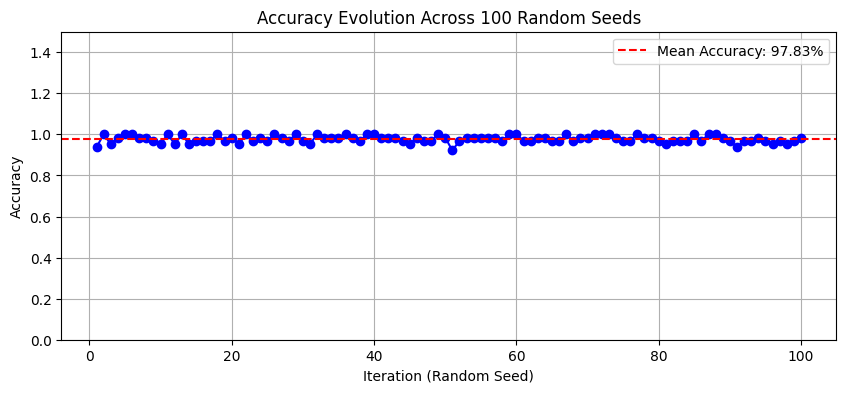

In [10]:
import tests

tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlpES_debiased_model_V6, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 99.43613707165109%
All accuracies: [0.9875389408099688, 0.9968847352024922, 0.9906542056074766, 0.9937694704049844, 0.9906542056074766, 0.9937694704049844, 0.9968847352024922, 0.9968847352024922, 0.9906542056074766, 0.9968847352024922, 0.9937694704049844, 0.9968847352024922, 0.9968847352024922, 0.9937694704049844, 0.9937694704049844, 0.9968847352024922, 0.9937694704049844, 0.9968847352024922, 0.9906542056074766, 0.9968847352024922, 0.9875389408099688, 0.9968847352024922, 0.9968847352024922, 0.9906542056074766, 0.9906542056074766, 0.9968847352024922, 0.9937694704049844, 0.9937694704049844, 0.9968847352024922, 0.9906542056074766, 0.9875389408099688, 0.9968847352024922, 0.9937694704049844, 0.9968847352024922, 0.9875389408099688, 1.0, 0.9906542056074766, 0.9906542056074766, 0.9968847352024922, 0.9937694704049844, 0.9968847352024922, 0.9968847352024922, 0.9906542056074766, 1.0, 1.0, 0.9875389408099688, 0.9906542056074766, 0.9906

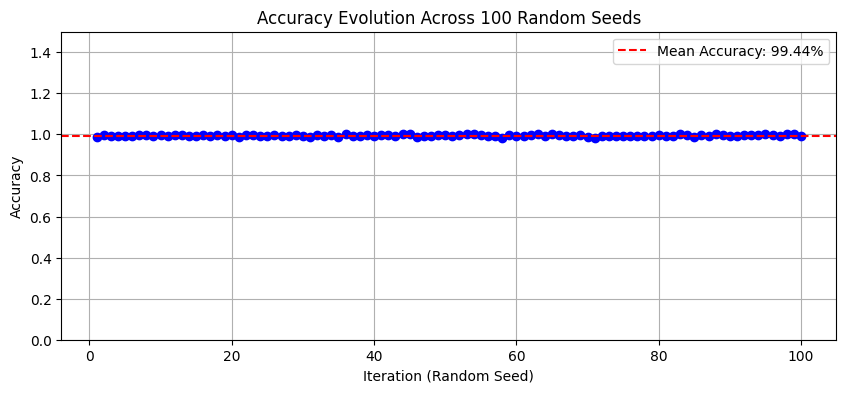

In [6]:
import tests

tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlpES_debiased_model_V6, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 99.41744548286604%
All accuracies: [0.9906542056074766, 0.9968847352024922, 0.9906542056074766, 0.9937694704049844, 0.9906542056074766, 0.9937694704049844, 0.9968847352024922, 0.9968847352024922, 0.9906542056074766, 0.9968847352024922, 0.9937694704049844, 0.9968847352024922, 0.9968847352024922, 0.9937694704049844, 0.9937694704049844, 0.9968847352024922, 0.9968847352024922, 0.9968847352024922, 0.9906542056074766, 1.0, 0.9906542056074766, 0.9906542056074766, 1.0, 0.9968847352024922, 0.9906542056074766, 0.9906542056074766, 0.9968847352024922, 0.9906542056074766, 0.9968847352024922, 0.9937694704049844, 0.9813084112149533, 0.9968847352024922, 0.9937694704049844, 0.9937694704049844, 0.9906542056074766, 1.0, 0.9906542056074766, 0.9937694704049844, 0.9937694704049844, 0.9906542056074766, 0.9968847352024922, 0.9968847352024922, 0.9906542056074766, 1.0, 1.0, 0.9937694704049844, 0.9937694704049844, 0.9813084112149533, 0.99376947040498

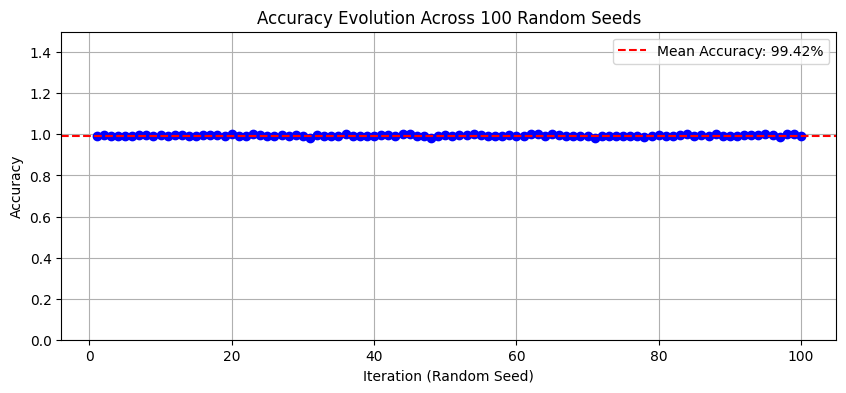

In [6]:
import tests

tests.Grammatical_Gender_Classification_Test(grammar_pairs, biased_model, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 98.0%
All accuracies: [0.953125, 0.984375, 0.953125, 0.984375, 1.0, 1.0, 0.984375, 0.96875, 0.96875, 0.953125, 1.0, 0.984375, 1.0, 0.953125, 0.96875, 0.984375, 0.984375, 1.0, 0.96875, 0.984375, 0.984375, 1.0, 0.984375, 1.0, 0.96875, 1.0, 0.984375, 0.984375, 0.984375, 0.96875, 0.953125, 1.0, 1.0, 0.984375, 0.984375, 0.984375, 1.0, 0.984375, 1.0, 0.984375, 1.0, 0.984375, 0.984375, 0.96875, 0.96875, 0.984375, 0.984375, 0.96875, 1.0, 0.96875, 0.921875, 0.96875, 0.984375, 0.984375, 0.984375, 0.953125, 0.984375, 0.984375, 1.0, 1.0, 1.0, 0.984375, 1.0, 0.96875, 0.953125, 0.984375, 1.0, 0.9375, 0.984375, 0.984375, 1.0, 0.984375, 1.0, 0.984375, 0.984375, 0.984375, 1.0, 0.984375, 0.96875, 0.96875, 0.96875, 0.953125, 0.96875, 0.96875, 1.0, 0.953125, 1.0, 0.984375, 0.96875, 0.96875, 0.9375, 0.96875, 0.96875, 1.0, 0.96875, 0.953125, 0.96875, 0.984375, 0.984375, 0.984375]
Mean Standard Deviation: 1.6694637986491352%


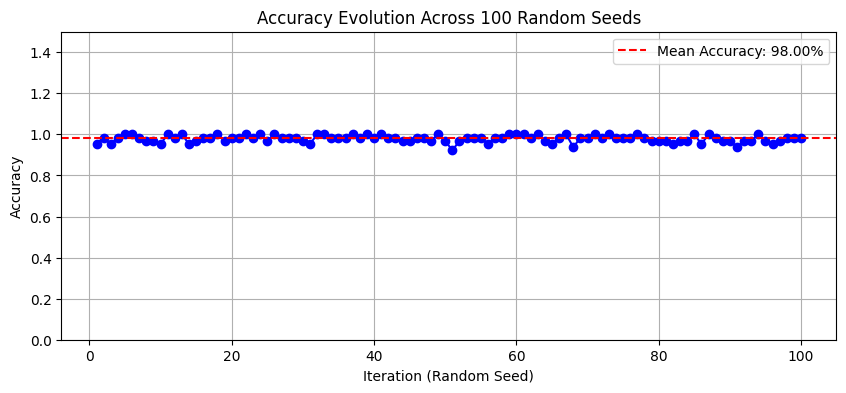

In [11]:
tests.Grammatical_Gender_Classification_Test(grammar_pairs, biased_model, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 98.0%
All accuracies: [0.953125, 0.984375, 0.953125, 0.984375, 1.0, 1.0, 0.984375, 0.96875, 0.96875, 0.953125, 1.0, 0.984375, 1.0, 0.953125, 0.96875, 0.984375, 0.984375, 1.0, 0.96875, 0.984375, 0.984375, 1.0, 0.984375, 1.0, 0.96875, 1.0, 0.984375, 0.984375, 0.984375, 0.96875, 0.953125, 1.0, 1.0, 0.984375, 0.984375, 0.984375, 1.0, 0.984375, 1.0, 0.984375, 1.0, 0.984375, 0.984375, 0.96875, 0.96875, 0.984375, 0.984375, 0.96875, 1.0, 0.96875, 0.921875, 0.96875, 0.984375, 0.984375, 0.984375, 0.953125, 0.984375, 0.984375, 1.0, 1.0, 1.0, 0.984375, 1.0, 0.96875, 0.953125, 0.984375, 1.0, 0.9375, 0.984375, 0.984375, 1.0, 0.984375, 1.0, 0.984375, 0.984375, 0.984375, 1.0, 0.984375, 0.96875, 0.96875, 0.96875, 0.953125, 0.96875, 0.96875, 1.0, 0.953125, 1.0, 0.984375, 0.96875, 0.96875, 0.9375, 0.96875, 0.96875, 1.0, 0.96875, 0.953125, 0.96875, 0.984375, 0.984375, 0.984375]
Mean Standard Deviation: 1.6694637986491352%


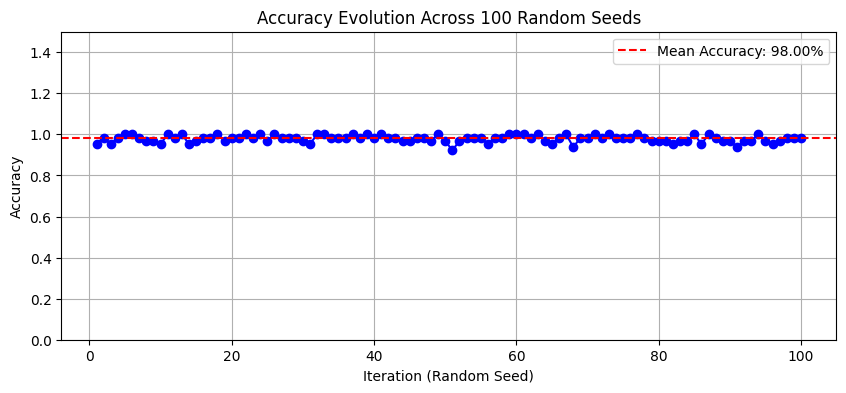

In [8]:
import tests

tests.Grammatical_Gender_Classification_Test(grammar_pairs, biased_model, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 97.359375%
All accuracies: [0.953125, 0.984375, 0.953125, 0.984375, 0.984375, 0.984375, 0.953125, 0.96875, 0.96875, 0.921875, 1.0, 0.96875, 1.0, 0.953125, 0.953125, 0.984375, 0.984375, 1.0, 0.953125, 0.984375, 0.984375, 1.0, 0.96875, 0.984375, 0.96875, 0.984375, 0.984375, 0.9375, 0.984375, 0.96875, 0.953125, 1.0, 0.984375, 0.96875, 0.96875, 1.0, 0.984375, 0.984375, 0.984375, 0.984375, 0.96875, 0.984375, 0.984375, 0.96875, 0.953125, 0.984375, 0.96875, 0.96875, 1.0, 0.984375, 0.90625, 0.96875, 0.96875, 0.9375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 1.0, 0.984375, 0.953125, 0.953125, 1.0, 0.96875, 0.96875, 0.96875, 0.9375, 0.984375, 0.984375, 1.0, 1.0, 1.0, 0.984375, 0.96875, 0.96875, 1.0, 0.984375, 0.96875, 0.96875, 0.96875, 0.96875, 0.953125, 0.953125, 1.0, 0.9375, 1.0, 0.984375, 1.0, 0.96875, 0.9375, 0.90625, 0.953125, 0.96875, 0.96875, 0.984375, 0.953125, 0.96875, 0.96875, 0.984375]
Mean Standard Deviation: 1.99

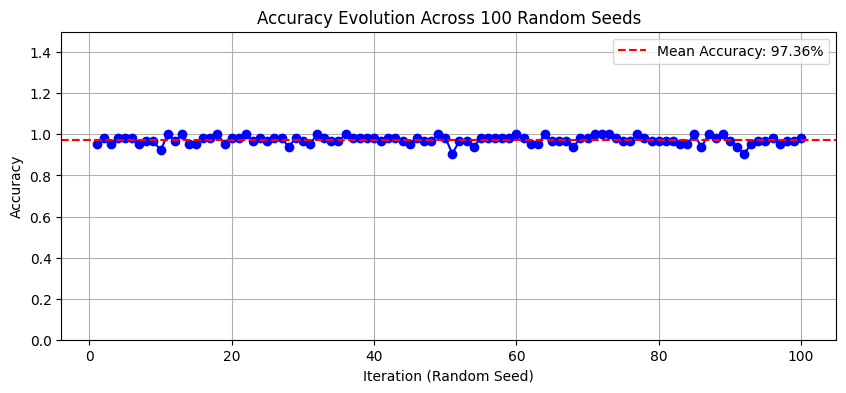

In [8]:
tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlpES_debiased_model_V7, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 100.0%
Mean Standard Deviation: 0.0%


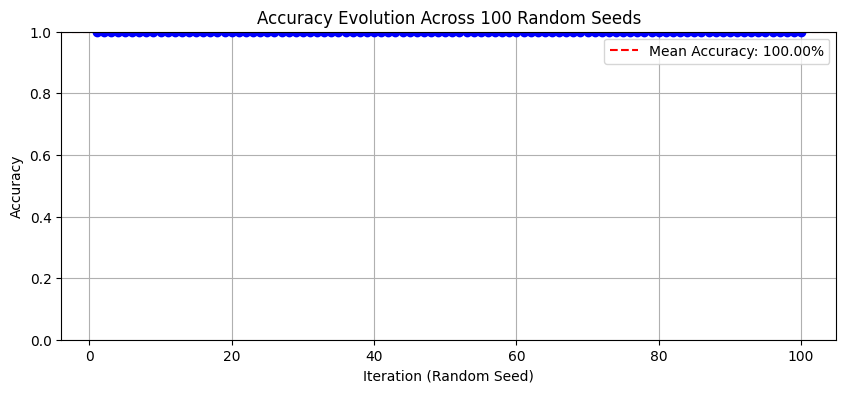

In [15]:
import tests

tests.Grammatical_Gender_Classification_Test(grammar_pairs, biased_model, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 89.921875%
All accuracies: [0.875, 0.921875, 0.8125, 0.9375, 0.90625, 0.921875, 0.90625, 0.90625, 0.84375, 0.859375, 0.90625, 0.828125, 0.921875, 0.890625, 0.859375, 0.90625, 0.953125, 0.96875, 0.890625, 0.921875, 0.875, 0.90625, 0.90625, 0.9375, 0.890625, 0.890625, 0.90625, 0.875, 0.9375, 0.875, 0.921875, 0.90625, 0.890625, 0.9375, 0.890625, 0.921875, 0.90625, 0.875, 0.890625, 0.90625, 0.890625, 0.875, 0.953125, 0.859375, 0.953125, 0.890625, 0.890625, 0.890625, 0.9375, 0.953125, 0.875, 0.921875, 0.921875, 0.859375, 0.859375, 0.9375, 0.84375, 0.953125, 0.890625, 0.90625, 0.90625, 0.90625, 0.921875, 0.875, 0.890625, 0.9375, 0.875, 0.8125, 0.90625, 0.921875, 0.921875, 0.96875, 0.921875, 0.90625, 0.875, 0.90625, 0.984375, 0.859375, 0.90625, 0.84375, 0.875, 0.828125, 0.84375, 0.90625, 0.921875, 0.84375, 0.96875, 0.96875, 0.875, 0.875, 0.859375, 0.90625, 0.890625, 0.90625, 0.90625, 0.921875, 0.875, 0.859375, 0.859375, 0.9375]
Me

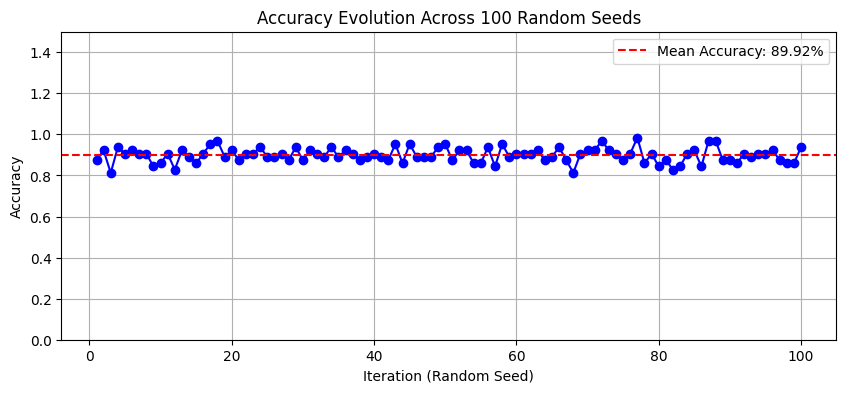

In [13]:
tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlp_debiased_model, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 90.625%
Mean Standard Deviation: 0.0%


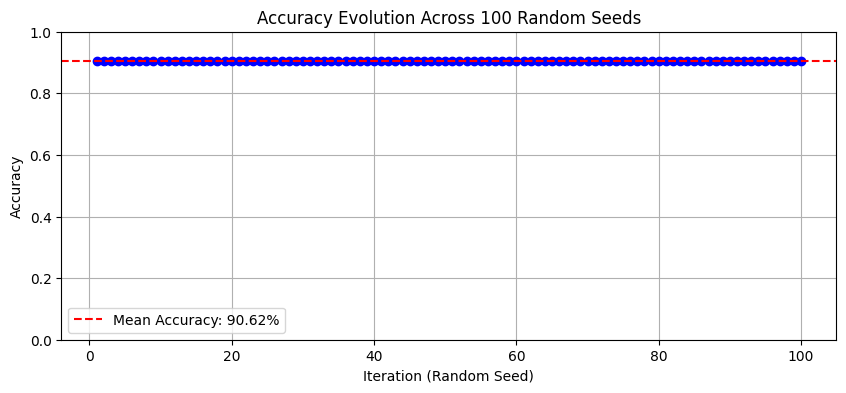

In [16]:
tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlp_debiased_model, 100)

In [11]:
tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlpES_debiased_model_V5, 100)

NameError: name 'inlpES_debiased_model_V5' is not defined


Logistic Regression
_________
100 random seeds
Mean Accuracy: 92.1875%
Mean Standard Deviation: 0.0%


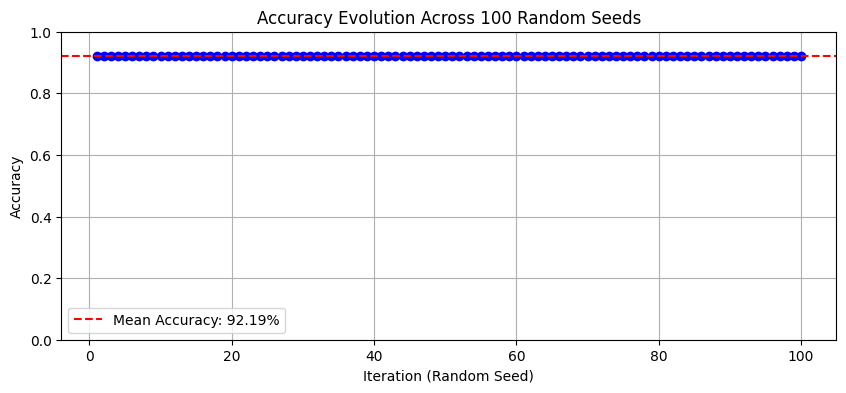

In [17]:
tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlpES_debiased_model_V5, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 90.90625%
All accuracies: [0.890625, 0.9375, 0.875, 0.9375, 0.890625, 0.953125, 0.90625, 0.890625, 0.875, 0.890625, 0.9375, 0.875, 0.953125, 0.90625, 0.921875, 0.90625, 0.9375, 0.921875, 0.96875, 0.859375, 0.9375, 0.890625, 0.890625, 0.953125, 0.9375, 0.921875, 0.921875, 0.828125, 0.9375, 0.921875, 0.890625, 0.90625, 0.9375, 0.890625, 0.921875, 0.921875, 0.921875, 0.9375, 0.921875, 0.90625, 0.921875, 0.90625, 0.890625, 0.875, 0.84375, 0.859375, 0.921875, 0.9375, 0.875, 0.890625, 0.875, 0.9375, 0.90625, 0.875, 0.859375, 0.921875, 0.9375, 0.96875, 0.953125, 0.9375, 0.90625, 0.90625, 0.9375, 0.890625, 0.890625, 0.9375, 0.953125, 0.84375, 0.9375, 0.875, 0.953125, 0.96875, 0.90625, 0.875, 0.921875, 0.875, 0.953125, 0.859375, 0.921875, 0.859375, 0.921875, 0.859375, 0.875, 0.9375, 0.921875, 0.890625, 0.953125, 0.921875, 0.890625, 0.921875, 0.90625, 0.90625, 0.890625, 0.921875, 0.90625, 0.890625, 0.859375, 0.90625, 0.890625, 0.9375

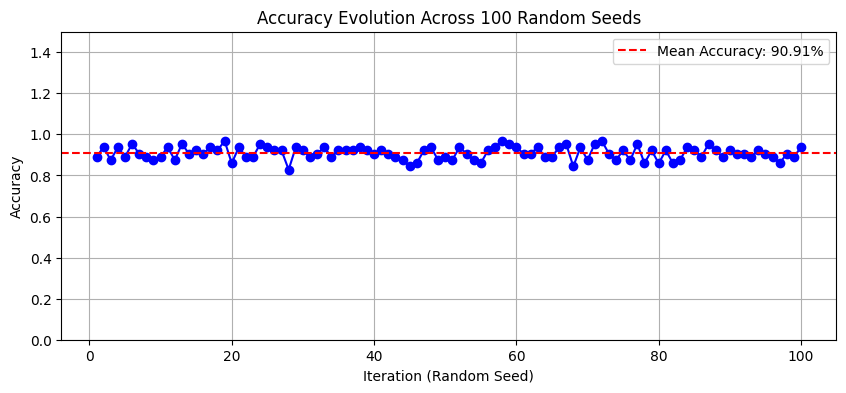

In [15]:
tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlpES_debiased_model_V5_mod, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 98.4375%
Mean Standard Deviation: 0.0%


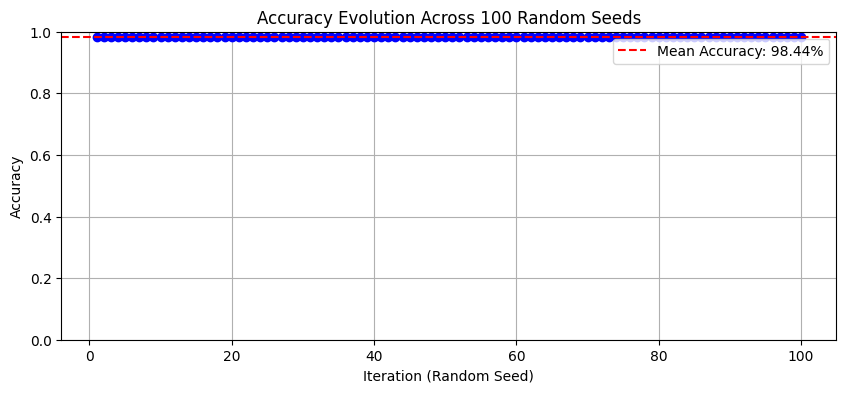

In [18]:
tests.Grammatical_Gender_Classification_Test(grammar_pairs, inlpES_debiased_model_V5_mod, 100)


Logistic Regression
_________
100 random seeds
Mean Accuracy: 93.00000000000001%
Mean Standard Deviation: 1.1102230246251565e-14%


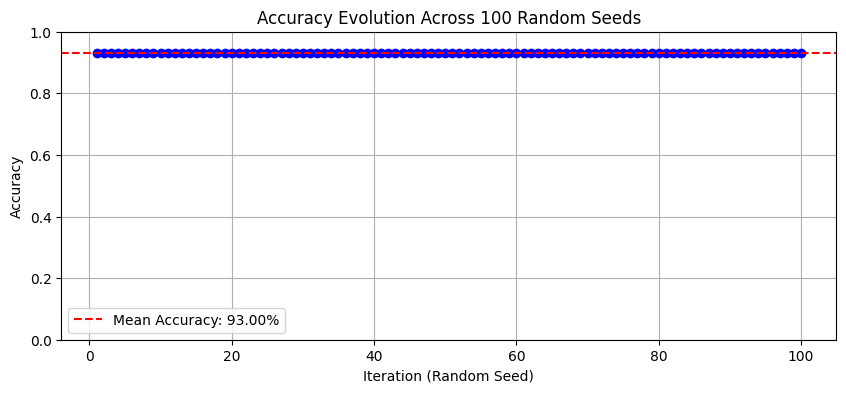


Logistic Regression
_________
100 random seeds
Mean Accuracy: 87.28571428571429%
Mean Standard Deviation: 0.0%


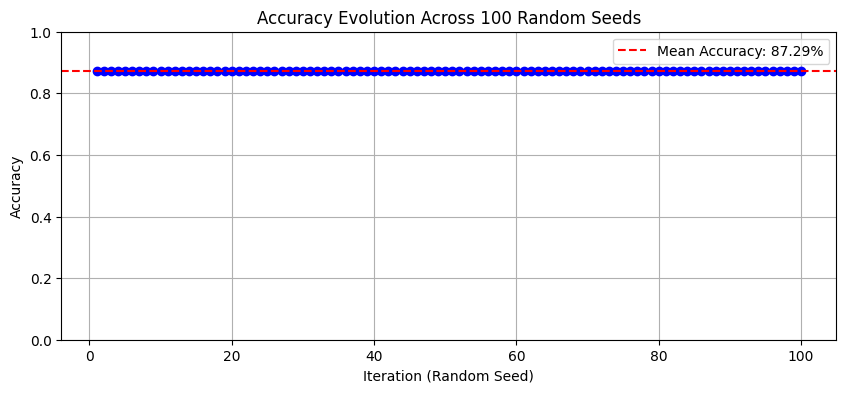


Logistic Regression
_________
100 random seeds
Mean Accuracy: 88.14285714285715%
Mean Standard Deviation: 1.1102230246251565e-14%


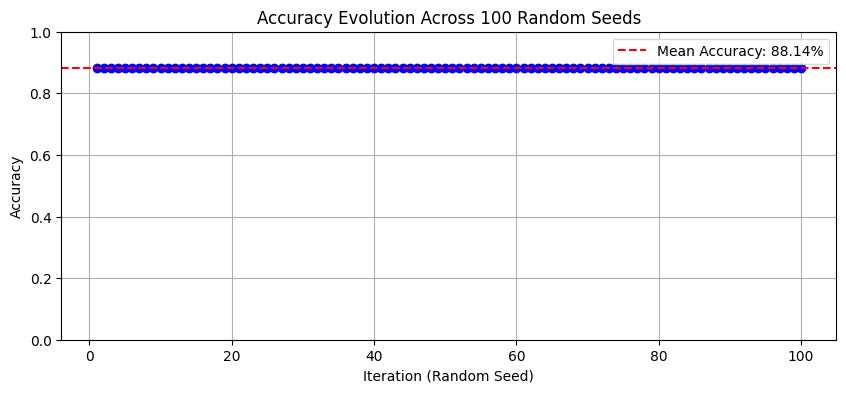


Logistic Regression
_________
100 random seeds
Mean Accuracy: 86.71428571428571%
Mean Standard Deviation: 0.0%


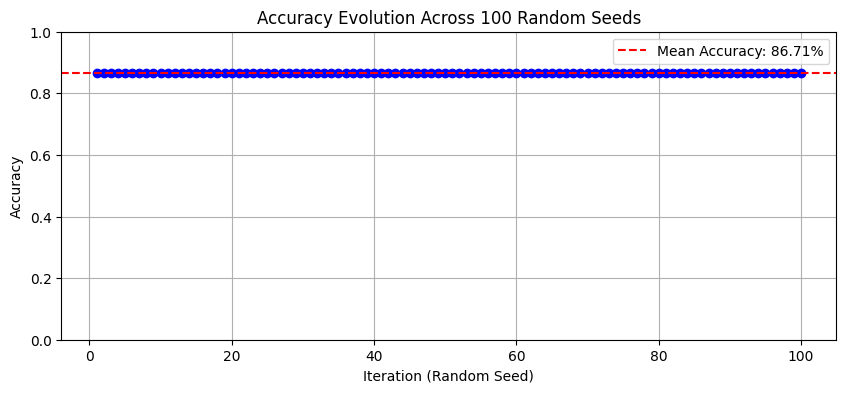


Logistic Regression
_________
100 random seeds
Mean Accuracy: 88.0%
Mean Standard Deviation: 0.0%


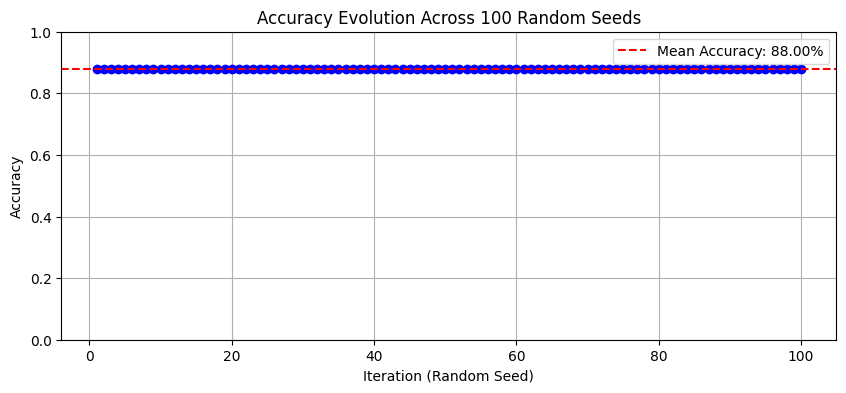


Logistic Regression
_________
100 random seeds
Mean Accuracy: 86.28571428571426%
Mean Standard Deviation: 2.220446049250313e-14%


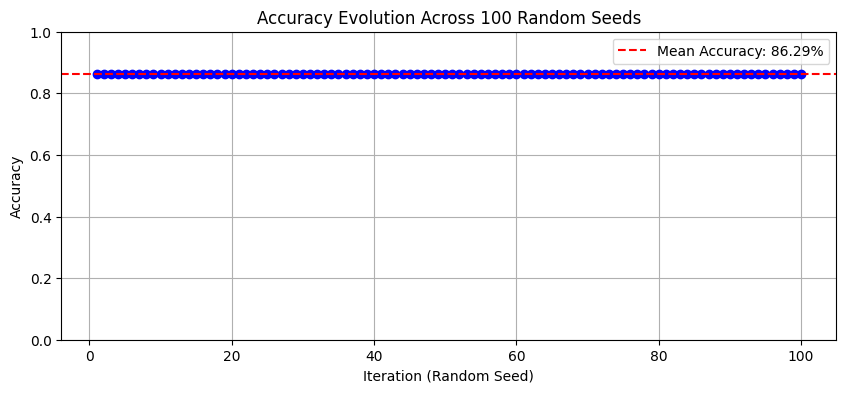

In [11]:
import tests

tests.Grammatical_Gender_Classification_Test(grammar_pairs_1000, biased_model, 100)
tests.Grammatical_Gender_Classification_Test(grammar_pairs_1000, inlp_debiased_model, 100)
tests.Grammatical_Gender_Classification_Test(grammar_pairs_1000, inlpES_debiased_model, 100) 
tests.Grammatical_Gender_Classification_Test(grammar_pairs_1000, inlpES_debiased_model_V2, 100) 
tests.Grammatical_Gender_Classification_Test(grammar_pairs_1000, inlpES_debiased_model_V3, 100) 
tests.Grammatical_Gender_Classification_Test(grammar_pairs_1000, inlpES_debiased_model_1000, 100) 

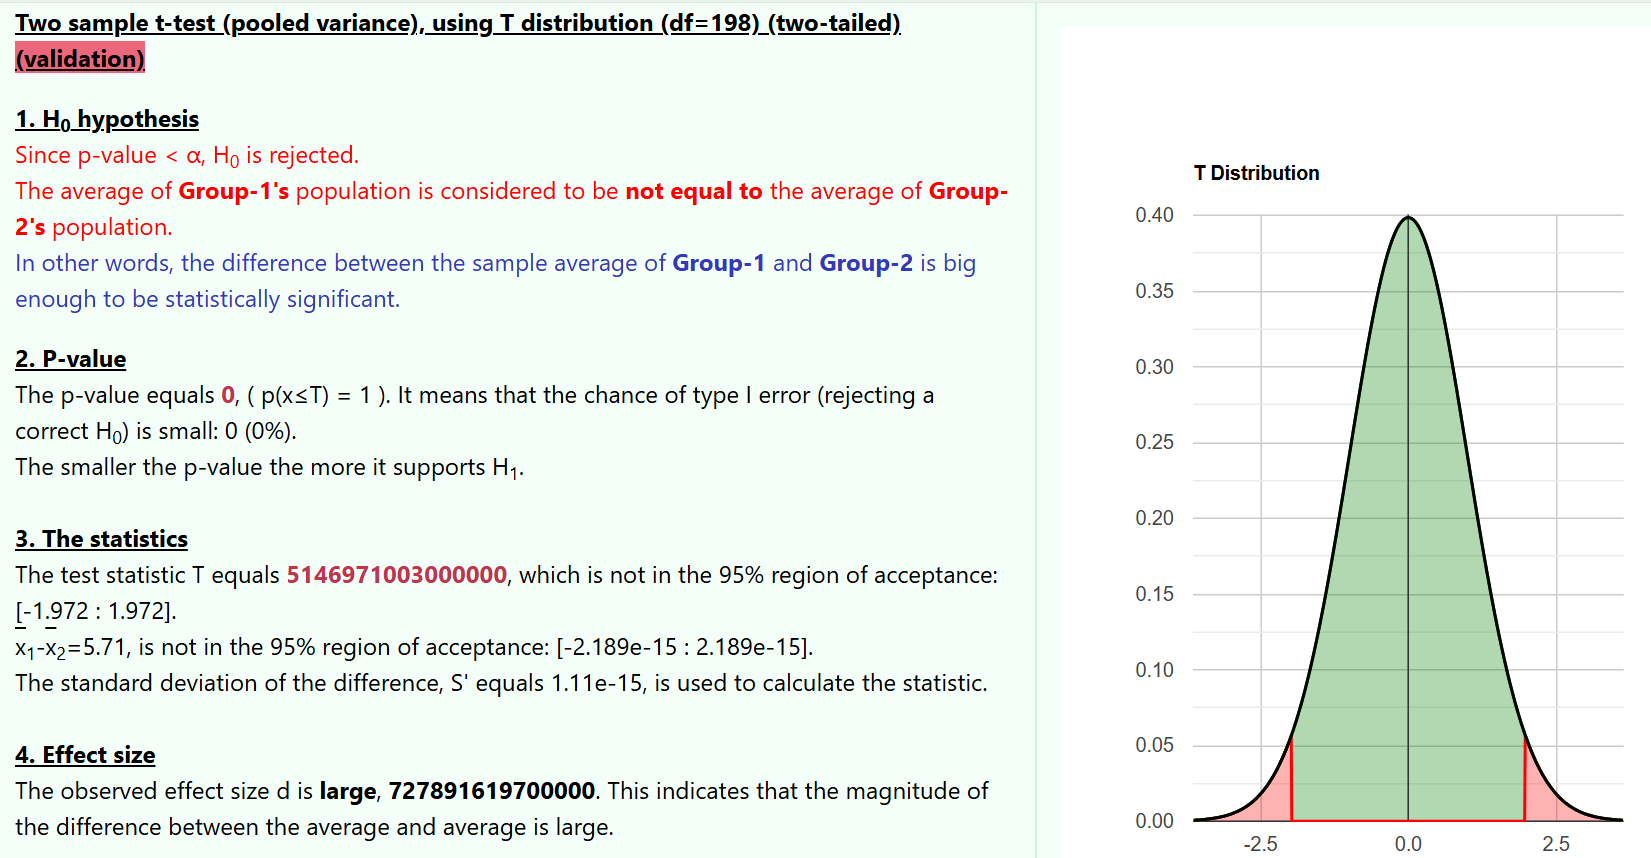

In [13]:
from IPython.display import Image
Image("img/two_sample_t_test_biased_inlp.png")

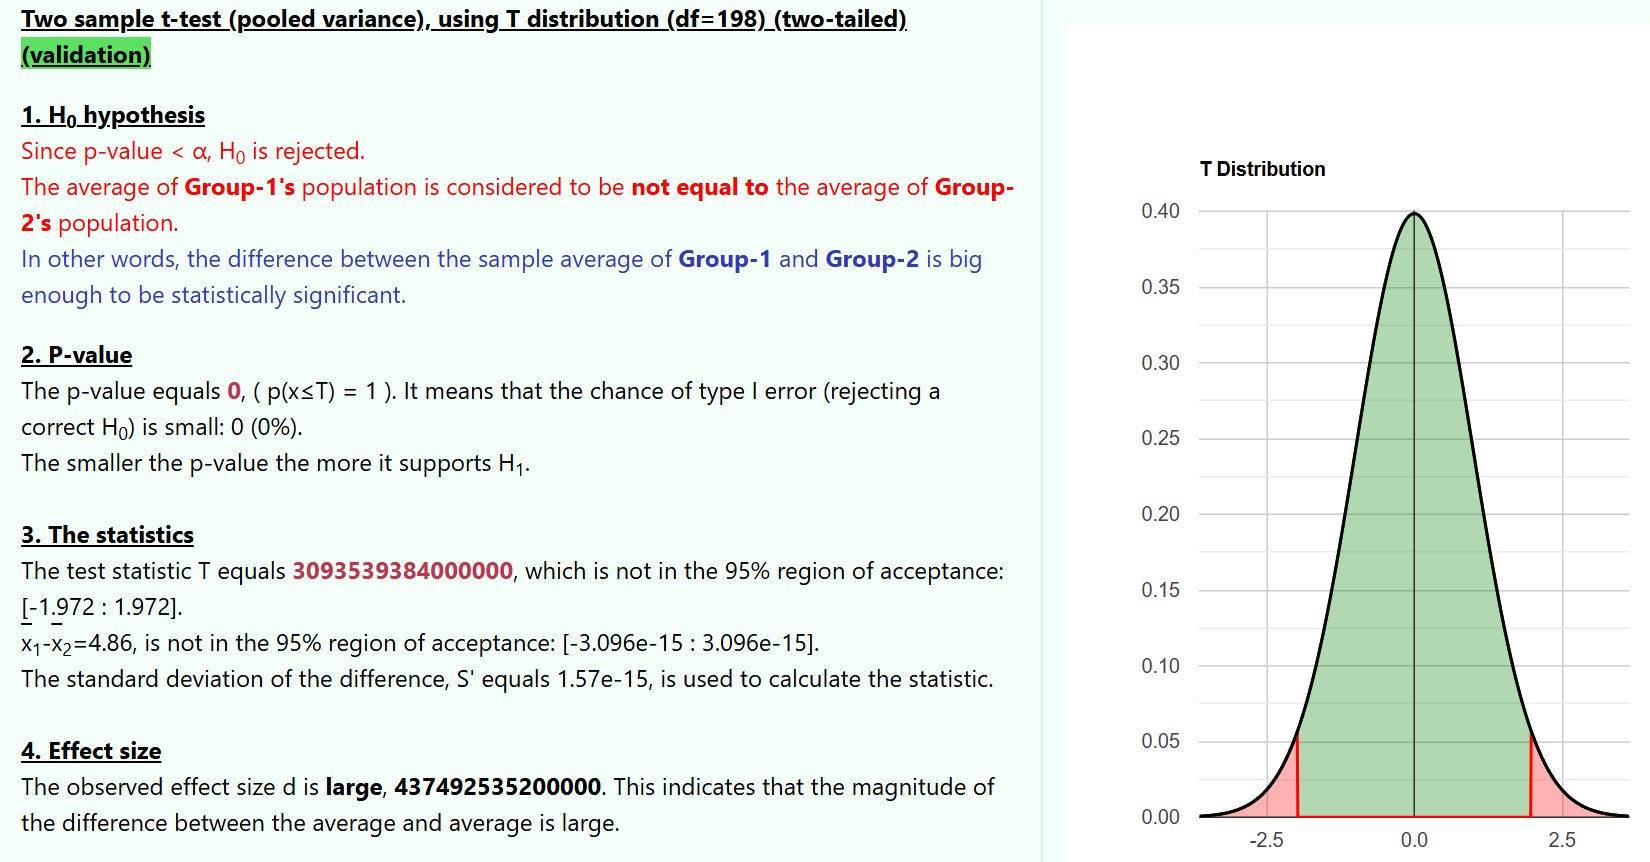

In [14]:
Image("img/two_sample_t_test_biased_inlpES.png")

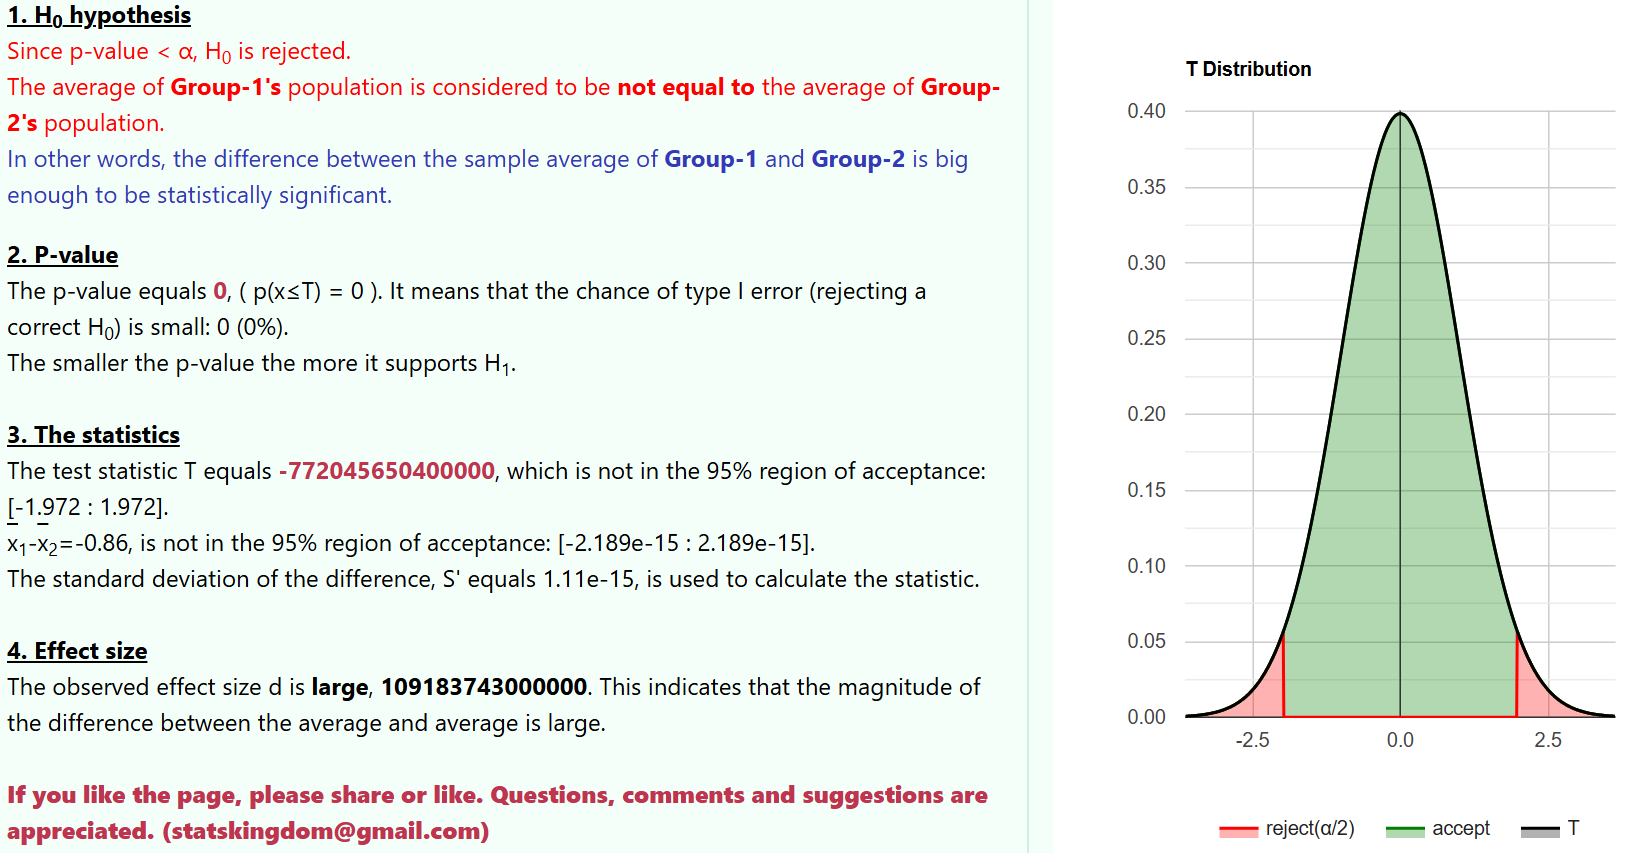

In [15]:
Image("img/two_sample_t_test_inlp_inlpES.png")